## Trabalho Final PANDAS

Este documento contém o projeto final realizado para o grupo de extensão PANDAS, em que o objetivo principal do trabalho é realizar a análise de dados para conseguir propor e responder perguntas sobre um conjunto de dados escolhido

O conjunto de dados que foi escolhido foi o conjunto das Eleições brasileiras, que foi disponibilizado pelo Tribunal Superior Eleitoral. O link desta base de dados pode ser encontrada em https://drive.google.com/file/d/1T7LDzjwAu2y8zMnRXO8qdBi0a4JaqmCH/view

Este trabalho foi realizados pelos alunos:

Gabriel Meirelles Carvalho Orlando RA: 790728

Geovanne Mansano Fritch da Silva RA: 791072

## 1. Determinação do conjunto de dados

O conjunto de dados escolhido contém informações sobre todos os individuos que se candidataram para alguma vaga nas eleições, podendo este individuo ter sido aceito para a candidatura ou não. 

In [ ]:
#Import das bibliotecas necessárias para a realização do trabalho proposto

import pandas as pd
import numpy as np

In [ ]:
# Realiza a importação do conjunto de dados que está no formato .csv
path = 'br_tse_eleicoes_2018_2022.csv'
df = pd.read_csv(path,low_memory=False)

Após o import podemos ter uma breve visualização de como o conjunto de dados está disposto

In [ ]:
df.head(10)

,ano,tipo_eleicao,sigla_uf,id_municipio,id_municipio_tse,id_candidato_bd,cpf,titulo_eleitoral,sequencial,numero,...,data_nascimento,idade,genero,instrucao,estado_civil,nacionalidade,sigla_uf_nascimento,municipio_nascimento,email,raca
0,2018,eleicao ordinaria,DF,NaN,NaN,105.0,01333015160,87699770400,70000612418,18007,...,1985-05-01,33.0,feminino,ensino superior completo,divorciado(a),brasileira,RS,Porto Alegre,lizianebrauner@hotmailcom,branca
1,2018,eleicao ordinaria,RR,NaN,NaN,270.0,32293593215,3011792682,230000605201,54300,...,1970-06-13,48.0,masculino,ensino medio completo,casado(a),brasileira,PI,Inhuma,elivaldocruzrr@hotmailcom,parda
2,2018,eleicao ordinaria,RR,NaN,NaN,537.0,32307209204,2718862631,230000615943,1888,...,1973-03-04,46.0,masculino,ensino superior completo,casado(a),brasileira,PA,Belém,cirororaima@yahoocombr,parda
3,2018,eleicao ordinaria,PR,NaN,NaN,713.0,32315457904,15458640647,160000629332,27115,...,1957-04-01,62.0,feminino,ensino medio completo,casado(a),brasileira,PR,Colombo,olescoveaup2016@gmailcom,branca
4,2018,eleicao ordinaria,RR,NaN,NaN,753.0,32317760230,1159942615,230000605200,54444,...,1971-02-12,48.0,masculino,ensino fundamental completo,solteiro(a),brasileira,RR,Boa Vista,girdenitorreias65@outlookcom,parda
5,2018,eleicao ordinaria,RR,NaN,NaN,1318.0,32344775234,1629222607,230000605207,54567,...,1970-10-20,48.0,masculino,ensino medio completo,casado(a),brasileira,RO,Porto Velho,mariomarcelokatia@gmailcom,parda
6,2018,eleicao ordinaria,GO,NaN,NaN,2989.0,32438630159,10434001031,90000629296,27650,...,1964-07-03,54.0,masculino,ensino superior completo,casado(a),brasileira,GO,Goiania,diogenesasmelo@hotmailcom,branca
7,2018,eleicao ordinaria,RO,NaN,NaN,7148.0,32642377253,5575892330,220000621048,350,...,1971-05-17,47.0,masculino,ensino superior incompleto,casado(a),brasileira,PE,Recife,martelo na bigorna wgt@hotmailcom,preta
8,2018,eleicao ordinaria,RO,NaN,NaN,7317.0,32650655291,1701662356,220000627661,18345,...,1962-08-22,56.0,masculino,ensino fundamental completo,casado(a),brasileira,RO,Porto Velho,marciormaia@hotmailcom,preta
9,2018,eleicao ordinaria,GO,NaN,NaN,7923.0,00134156030,81208560418,90000616494,2710,...,1983-05-31,35.0,masculino,ensino superior completo,casado(a),brasileira,RS,Agudo,aitousama@gmailcom,branca


Além disso, é uma tarefa muito importante descobrir o formato do dataset e quais os tipos de cada atributo

In [ ]:
#Formato do dataset
df.shape

(614352, 27)

In [ ]:
df.dtypes

ano                       int64
tipo_eleicao             object
sigla_uf                 object
id_municipio            float64
id_municipio_tse        float64
id_candidato_bd         float64
cpf                      object
titulo_eleitoral          int64
sequencial                int64
numero                    int64
nome                     object
nome_urna                object
numero_partido            int64
sigla_partido            object
cargo                    object
situacao                 object
ocupacao                 object
data_nascimento          object
idade                   float64
genero                   object
instrucao                object
estado_civil             object
nacionalidade            object
sigla_uf_nascimento      object
municipio_nascimento     object
email                    object
raca                     object
dtype: object

Acima, podemos compreender que este conjunto de dados contém dados inteiros, float e objetos, que são strings. Com essa informação será possível entender melhor como o pré-processamento dos dados será realizado

Outra tarefa importante é visualizar se no conjunto de dados existem valores faltantes, ou seja, se atributos possuem valores nulos entre seus possíveis valores

In [ ]:
def print_nulos(df):
    
    #Pega as colunas do dataframe
    colunas = df.columns
    
    #Pega os valores nulos de cada atributo
    nulos = df.isna().sum() 
    tot = 0
    qntd_nul  = 0
    for i in colunas:
        porc = nulos[i] / df.shape[0]
        print(f"A coluna {i} contém {nulos[i]} valor(es) nulo(s), representando {porc}%\n")
        tot += nulos[i]
        if nulos[i] != 0:
            qntd_nul += 1
    print(f"Existem {tot} valores nulos no total\nExiste(m) {qntd_nul} atributo(s) com valor(es) nulo(s)")

In [ ]:
print_nulos(df)

A coluna ano contém 0 valor(es) nulo(s), representando 0.0%

A coluna tipo_eleicao contém 0 valor(es) nulo(s), representando 0.0%

A coluna sigla_uf contém 51 valor(es) nulo(s), representando 8.301429799203063e-05%

A coluna id_municipio contém 57945 valor(es) nulo(s), representando 0.09431889210094539%

A coluna id_municipio_tse contém 57945 valor(es) nulo(s), representando 0.09431889210094539%

A coluna id_candidato_bd contém 708 valor(es) nulo(s), representando 0.0011524337838893664%

A coluna cpf contém 0 valor(es) nulo(s), representando 0.0%

A coluna titulo_eleitoral contém 0 valor(es) nulo(s), representando 0.0%

A coluna sequencial contém 0 valor(es) nulo(s), representando 0.0%

A coluna numero contém 0 valor(es) nulo(s), representando 0.0%

A coluna nome contém 0 valor(es) nulo(s), representando 0.0%

A coluna nome_urna contém 0 valor(es) nulo(s), representando 0.0%

A coluna numero_partido contém 0 valor(es) nulo(s), representando 0.0%

A coluna sigla_partido contém 0 valor(e

### Análise dos atributos

#### Atributos Numéricos

Atributos numéricos são aqueles que são representados por números e seus valores são representados por valores inteiros, floats, etc...

Dentro desta categoria, destacam-se dois tipos de atributos numéricos. O Discreto e o Contínuo.

Os atributos Numéricos Discretos são os mais simples, já que representam um número finito de valores. Como por exemplo o atributo idade, que pode é um atributo numérico discreto.

Já os atributos Numéricos Contínuos representam um número infinito de valores e geralmente são representados por números reais. Como por exemplo a temperatura.

#### Atributos Categóricos

Os atributos Categóricos são aqueles que são representados por palavras ou por símbolos, representando qualidades de algo (pode ser chamado de Qulitativo)

Dentro desta categoria, destacam-se dois tipos de atributos categóricos. O Nominal e o Ordinal

Os atributos Categóricos Nominais são atributos que entre os seus respectivos valores, os símbolos/palavras/qualidades não possuem relação de ordem entre si

Já os atributos Categóricos Ordinais são atributos que entre os seus respectivos valores, os símbolos/palavras/qualidades possuem relação de ordem entre si

#### Atributos

Abaixo podemos ver todos os atributos do dataset e também o tipo de atributo que ele é.

In [ ]:
def define_tipo(df):
    
    #Pega as informações sobre o dataframe
    colunas = df.columns
    tipos = df.dtypes
    
    categoricos = []
    numericos = []
    atributos = {}
    for i in colunas:
        tipo = tipos[i]
        
        if tipo == 'int64' or tipo == 'int32' or tipo == 'float64' or tipo == 'float32' or tipo == 'float16':
            numericos.append(i)
        else:
            categoricos.append(i)


    atributos['categoricos'] = categoricos
    atributos['numericos'] = numericos

    return atributos
    
    

In [ ]:
define_tipo(df)

{'categoricos': ['tipo_eleicao',
  'sigla_uf',
  'cpf',
  'nome',
  'nome_urna',
  'sigla_partido',
  'cargo',
  'situacao',
  'ocupacao',
  'data_nascimento',
  'genero',
  'instrucao',
  'estado_civil',
  'nacionalidade',
  'sigla_uf_nascimento',
  'municipio_nascimento',
  'email',
  'raca'],
 'numericos': ['ano',
  'id_municipio',
  'id_municipio_tse',
  'id_candidato_bd',
  'titulo_eleitoral',
  'sequencial',
  'numero',
  'numero_partido',
  'idade']}

Acima, algumas incoêrencias podem ser visualizadas, como por exemplo a idade ser um atributo numérico discreto, já que geralmente idade é um valor inteiro (pelo menos do jeito que está disposto no dataset, com apenas a contagem dos anos por inteiro). Mas isto será resolvido na etapa de pré-processamento

In [ ]:
#Importando as bibliotecas que permite a visualização de dados
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
remove_att = []

##### Ano

O atributo ano diz respeito ao ano em que a eleição ocorreu. É esperado que a maioria dos valores sejam de 2020, que é quando acontecem as eleições regionais para prefeito, vice-prefeito e vereador, que como é algo local tende a ter muitos representantes elevando o número de exemplos com o atributo ANO igual à 2020

In [ ]:
ano = df['ano']

In [ ]:
ano.dtype

dtype('int64')

Como foi visualizado acima o atributo ANO não possui nenhum valor nulo e é um atributo numérico discreto, o que está correto.

Abaixo como podemos visualizar, podemos ver algumas características do atributo ANO.

A primeira coisa é que os valores estão no intervalo 2018-2022, já que o valor mínimo é 2018 e o máximo é 2022.

Além disso, pelas descrições dos quartis, pode-se verificar que a maioria dos dados são representados pelo ano de 2020.

Um outro ponto para se atentar é o baixo desvio padrão, que é algo esperado quando se trata de um intervalo de anos, já que a variação do valor não é tão grande, neste caso há uma variação de no máximo 4

In [ ]:
ano.describe()

count    614352.000000
mean       2020.000003
std           0.614228
min        2018.000000
25%        2020.000000
50%        2020.000000
75%        2020.000000
max        2022.000000
Name: ano, dtype: float64

<AxesSubplot: title={'center': 'Ano de eleição dos candidatos (2018-2022)'}, ylabel='ano'>

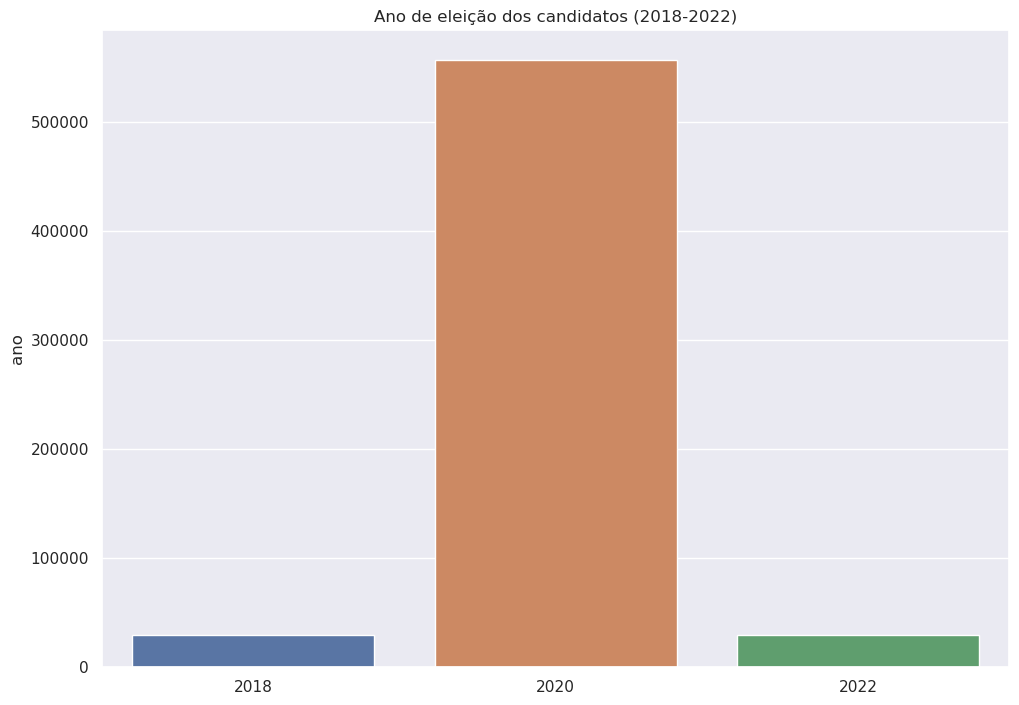

In [ ]:
#Plot do gráfico
sns.set(rc={'figure.figsize':(11.7,8.27)})
anos = ano.unique()
qntd = ano.value_counts().sort_values()
plt.title("Ano de eleição dos candidatos (2018-2022)")
sns.barplot(x=anos,y=qntd)

Como já tinha sido interpretado antes pela disposição dos quartis a maioria dos valores para este atributo são representados pelo valor "2020".

Este atributo não é tão importante para a análise que será realizada, visto que ele não explica muita coisa

In [ ]:
remove_att.append('ano')

In [ ]:
#Baixo uso de memória
del ano,anos,qntd

##### Título Eleitoral

O título eleitoral não será um atributo tão relevante aqui visto que representa apenas uma identificação do indivíduo, e dessa forma não fornece informação relevante para a futura análise

In [ ]:
titulo_eleitoral = df['titulo_eleitoral']

In [ ]:
titulo_eleitoral

0         87699770400
1          3011792682
2          2718862631
3         15458640647
4          1159942615
             ...     
614347    17330751805
614348     9329122798
614349     1241842526
614350     1456312585
614351    22470331368
Name: titulo_eleitoral, Length: 614352, dtype: int64

In [ ]:
remove_att.append('titulo_eleitoral')

In [ ]:
#Uso de memória
del titulo_eleitoral

##### Sequencial

O número sequencial não será um atributo tão relevante visto que também representa um número de identificação do candidato

In [ ]:
sequencial = df['sequencial']

In [ ]:
sequencial

0          70000612418
1         230000605201
2         230000615943
3         160000629332
4         230000605200
              ...     
614347    110001242273
614348    270001151286
614349     30001085422
614350     30001085436
614351     30001085439
Name: sequencial, Length: 614352, dtype: int64

In [ ]:
remove_att.append('sequencial')

In [ ]:
#Uso de memória
del sequencial

##### Número

Novamente, o número não será um atributo relevante pois se trata novamente de outro tipo de identificação

In [ ]:
nro = df['numero']

In [ ]:
nro

0         18007
1         54300
2          1888
3         27115
4         54444
          ...  
614347    77123
614348    77789
614349    77190
614350    77677
614351    77555
Name: numero, Length: 614352, dtype: int64

In [ ]:
remove_att.append('numero')

In [ ]:
del nro

##### Número Partido

O número do partido é algo relevante na análise já que indica a qual partido o candidato pertence, entretanto é um atributo redundante que pode ser retirado já que a SIGLA do partido é mais informativo e também fornece identificação.

In [ ]:
nro_partido = df['numero_partido']

In [ ]:
nro_partido

0         18
1         54
2         18
3         27
4         54
          ..
614347    77
614348    77
614349    77
614350    77
614351    77
Name: numero_partido, Length: 614352, dtype: int64

In [ ]:
remove_att.append('numero_partido')

In [ ]:
del nro_partido

##### Id Municipio

Novamente este atributo se trata de uma identificação do Munícipio do candidato que é algo que não é extremamente necessário para a análise visto que se trata de um valor de identificação

In [ ]:
id_mun = df['id_municipio']

In [ ]:
id_mun

0               NaN
1               NaN
2               NaN
3               NaN
4               NaN
            ...    
614347    5107156.0
614348    1706506.0
614349    1600303.0
614350    1600303.0
614351    1600303.0
Name: id_municipio, Length: 614352, dtype: float64

Como foi visto acima, este atributo possui valores nulos, mas como vai ser retirado não há necessidade de pensar em como lidar com isto

In [ ]:
remove_att.append('id_municipio')

In [ ]:
del id_mun

##### Id Municipio TSE

Como se trata de um um ID não será utilizado para a análise de dados

In [ ]:
tse_id = df['id_municipio_tse']

In [ ]:
tse_id

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
           ...   
614347    98914.0
614348    73032.0
614349     6050.0
614350     6050.0
614351     6050.0
Name: id_municipio_tse, Length: 614352, dtype: float64

Como pode ser visto acima este atributo possui valores nulos, mas como vai ser retirado não há necessidade de tratar os valores faltantes

In [ ]:
remove_att.append('id_municipio_tse')

In [ ]:
del tse_id

##### Id Candidado Bd

Como já foi dito anteriormente os ID geralmente não são informativos e podem ser retirados sem que haja perda da informação

In [ ]:
id_bd = df['id_candidato_bd']

In [ ]:
id_bd

0            105.0
1            270.0
2            537.0
3            713.0
4            753.0
            ...   
614347         NaN
614348         NaN
614349    122692.0
614350    193287.0
614351    417282.0
Name: id_candidato_bd, Length: 614352, dtype: float64

Como pode ser visto acima, este atributo possui valores faltantes mas novamente como será retirado não há necessidade de tratar isto

In [ ]:
remove_att.append('id_candidato_bd')

In [ ]:
del id_bd

##### Idade

A idade de um candidato é algo que pode ser bem utilizado para a análise, logo é um atributo importante que deve ser mantido

In [ ]:
idade = df['idade']

In [ ]:
idade

0         33.0
1         48.0
2         46.0
3         62.0
4         48.0
          ... 
614347    60.0
614348    64.0
614349    49.0
614350    47.0
614351    50.0
Name: idade, Length: 614352, dtype: float64

Como pode ser visto, e citado anteriormente, o atributo idade está como float, o que não é adequado, mas isto acontece pela presença de valores nulos, que fazem com que o pandas interprete a coluna como sendo float64, este empecilho será tratado na fase de pré-processamento

In [ ]:
idade.dtype

dtype('float64')

Como visualizado acima o atributo IDADE possui valores nulos

Abaixo, pode-se verificar algumas características do atributo IDADE

Como por exemplo que as idades estão dispostas no intervalo de 17 à 100

Além disso, a média de idade dos candidatos é de 46 anos, e a distribuição dos valores representada pelos quartis pode ser identificada.

In [ ]:
idade.describe()

count    614320.000000
mean         46.066633
std          11.569127
min          17.000000
25%          38.000000
50%          46.000000
75%          54.000000
max         100.000000
Name: idade, dtype: float64

<AxesSubplot: title={'center': 'Boxplot idade candidatos'}, xlabel='idade'>

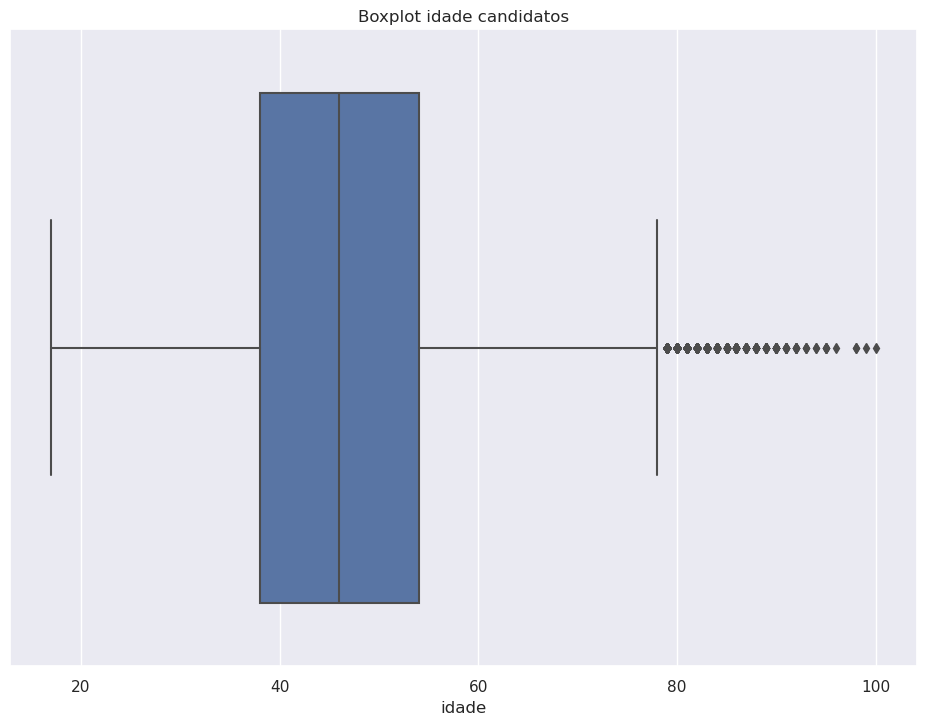

In [ ]:
#Plot do gráfico
sns.set(rc={'figure.figsize':(11.7,8.27)})
plt.title("Boxplot idade candidatos")
sns.boxplot(x=idade)

Podemos verificar com este boxplot que os valores acima de 80 são outliers, já que não estão dentro dos limites criados.

In [ ]:
(idade[idade > 80].count() / idade.count())*100

0.1261557494465425

Podemos compreender que valores para o atributo IDADE acima de 80 representam apenas 0.12% dos valores do conjunto de dados.

Além disso, devemos nos atentar para possíveis valores NULOS

In [ ]:
df['idade'].isna().sum()

32

In [ ]:
df[(df['idade'].isna()) & (df['situacao'] == 'deferido') ]

,ano,tipo_eleicao,sigla_uf,id_municipio,id_municipio_tse,id_candidato_bd,cpf,titulo_eleitoral,sequencial,numero,...,data_nascimento,idade,genero,instrucao,estado_civil,nacionalidade,sigla_uf_nascimento,municipio_nascimento,email,raca
258734,2020,eleicao ordinaria,BA,2922904.0,37591.0,467347.0,62841106500,67513970523,50001061495,19123,...,NaN,NaN,feminino,ensino fundamental incompleto,divorciado(a),brasileira,BA,Nova Soure,simonefarias@outlookcom,parda
450149,2020,eleicao ordinaria,RS,4309308.0,86851.0,137425.0,39719499087,7104580485,210001073086,10888,...,1919-10-03,NaN,feminino,ensino medio completo,divorciado(a),brasileira,RS,Caçapava Do Sul,republicanosguaiba@gmailcom,branca
462396,2018,eleicao ordinaria,DF,NaN,NaN,NaN,000000000-4,-4,70000602381,300,...,NaN,NaN,NaN,NaN,NaN,NaN,Não divulgável,Não Divulgável,NaN,NaN
512227,2020,eleicao ordinaria,BA,2918407.0,36692.0,935259.0,02917357541,106401240566,50001183046,15444,...,1919-11-09,NaN,feminino,ensino fundamental completo,divorciado(a),brasileira,BA,Juazeiro,catiamiulinda@gmailcom,preta
534276,2020,eleicao ordinaria,BA,2914406.0,35890.0,1793564.0,31698391870,309065080191,50001213318,40444,...,1900-10-11,NaN,feminino,le e escreve,solteiro(a),brasileira,BA,Iraquara,psbiraquaracandidato@gmailcom,parda
540142,2020,eleicao ordinaria,MS,5004908.0,90972.0,82336.0,36538515134,2831681961,120001101287,55123,...,1904-05-22,NaN,masculino,ensino fundamental incompleto,divorciado(a),brasileira,MS,Jaraguari,matheuzinho silva13@hotmailcom,branca
585380,2020,eleicao ordinaria,PB,2500601.0,19119.0,1266773.0,08479355409,39214511260,150001239116,50555,...,1919-01-03,NaN,feminino,ensino medio completo,solteiro(a),brasileira,PB,Alhandra,psol50alhandra@hotmailcom,preta


Embora existam 32 linhas que contém o atributo idade nulo, apenas 7 delas contém a situacao 'deferido' que é o relevante para esta análise.

Quando se trata de limpeza e processamento de dados, envolvendo tratamento de valores faltantes, existem diversas maneira de tratar isso.

Entretanto, como a idade de um exemplo é algo muito particular, ou seja, não é algo muito fácil de prever com base nos atributos acima, o mais interessante a se fazer é remover estes exemplos, já que são apenas 6

In [ ]:
#Porcentagem que representa 6 linhas
(7/df.shape[0]) * 100

0.0011394119332239498

##### Tipo Eleição

Este atributo está relacionado com o tipo de eleição que o candidato  participou, e é uma tecnicidade das eleições brasileiras, algo muito complexo, logo pode ser removido sem nenhum dado à análise.

In [ ]:
tipo_elei = df['tipo_eleicao']

In [ ]:
tipo_elei

0                     eleicao ordinaria
1                     eleicao ordinaria
2                     eleicao ordinaria
3                     eleicao ordinaria
4                     eleicao ordinaria
                      ...              
614347                eleicao ordinaria
614348                eleicao ordinaria
614349    eleicoes municipais 2020 - ap
614350    eleicoes municipais 2020 - ap
614351    eleicoes municipais 2020 - ap
Name: tipo_eleicao, Length: 614352, dtype: object

Este atributo não possui nenhum valor nulo, o que seria bom caso o atributo tivesse algum relevância.

In [ ]:
remove_att.append('tipo_eleicao')

In [ ]:
del tipo_elei

##### Sigla UF

Este atributo é um atributo importante, pois identifica qual estado o candidato pertence, ou seja, por qual estado ele governa, o que é interessante para a análise.

In [ ]:
sigla = df['sigla_uf']

In [ ]:
sigla

0         DF
1         RR
2         RR
3         PR
4         RR
          ..
614347    MT
614348    TO
614349    AP
614350    AP
614351    AP
Name: sigla_uf, Length: 614352, dtype: object

Este atributo é um Categórico Nominal, já que seus valores representam estados, e estados não tem relação de ordem entre si.

In [ ]:
sigla.dtype

dtype('O')

Como pode ser visto, este atributo possui valores NULOS, que devem ser tratados e entendidos por que eles são nulos

Abaixo podemos ver as instâncias que tem o atributo sigla_uf NULA

In [ ]:
df[sigla.isna()].head(5)

,ano,tipo_eleicao,sigla_uf,id_municipio,id_municipio_tse,id_candidato_bd,cpf,titulo_eleitoral,sequencial,numero,...,data_nascimento,idade,genero,instrucao,estado_civil,nacionalidade,sigla_uf_nascimento,municipio_nascimento,email,raca
707,2018,eleicao ordinaria,NaN,NaN,NaN,1390997.0,11980761272,962092402,280000622171,18,...,1958-02-08,61.0,feminino,ensino superior completo,casado(a),brasileira,AC,Rio Branco,juridicomarina18@gmailcom,preta
806,2018,eleicao ordinaria,NaN,NaN,NaN,1607516.0,22297081049,7483402062,280000624083,54,...,1955-01-24,64.0,masculino,ensino superior completo,casado(a),brasileira,RS,Rosario Do Sul,leoalves@terracombr,branca
809,2018,eleicao ordinaria,NaN,NaN,NaN,1610966.0,01061712834,86137520124,280000624085,27,...,1939-11-02,79.0,masculino,ensino superior completo,casado(a),brasileira,RS,Porto Alegre,eymael@uolcombr,branca
1222,2022,eleicao ordinaria,NaN,NaN,NaN,462121.0,01970801891,96786790159,280001644129,44,...,1945-08-23,77.0,masculino,ensino superior completo,casado(a),brasileira,SP,São Paulo,NaN,branca
1710,2022,eleicao ordinaria,NaN,NaN,NaN,1057821.0,04551706493,56283400876,280001600166,21,...,1978-10-07,44.0,masculino,ensino superior completo,solteiro(a),brasileira,PE,Recife,NaN,preta


Podemos verificar algumas propriedades dessas instâncias, como por exemplo o "Cargo" para verificar se existe algum padrão

In [ ]:
df[sigla.isna()]['cargo'].unique()

array(['presidente', 'vice-presidente'], dtype=object)

Como pode ser visualizado acima, o atributo "sigla_uf" é nulo quando o cargo do candidato é presidente ou vice presidente, já que ele não pertence a uma Unidade Federativa específica, mas sim ao Brasil

Para corrigir isto e lidar com o problema dos valores nulos, uma solução é colocar 'sem UF, já que o cargo de presidente se refere a mando Nacional.

ALém disso, podemos ver a distribuição dos valores

In [ ]:
#Remove o nan que é tratado como valor
x = np.sort(sigla.unique()[:-1])

In [ ]:
y = sigla.value_counts().sort_index()

<AxesSubplot: ylabel='sigla_uf'>

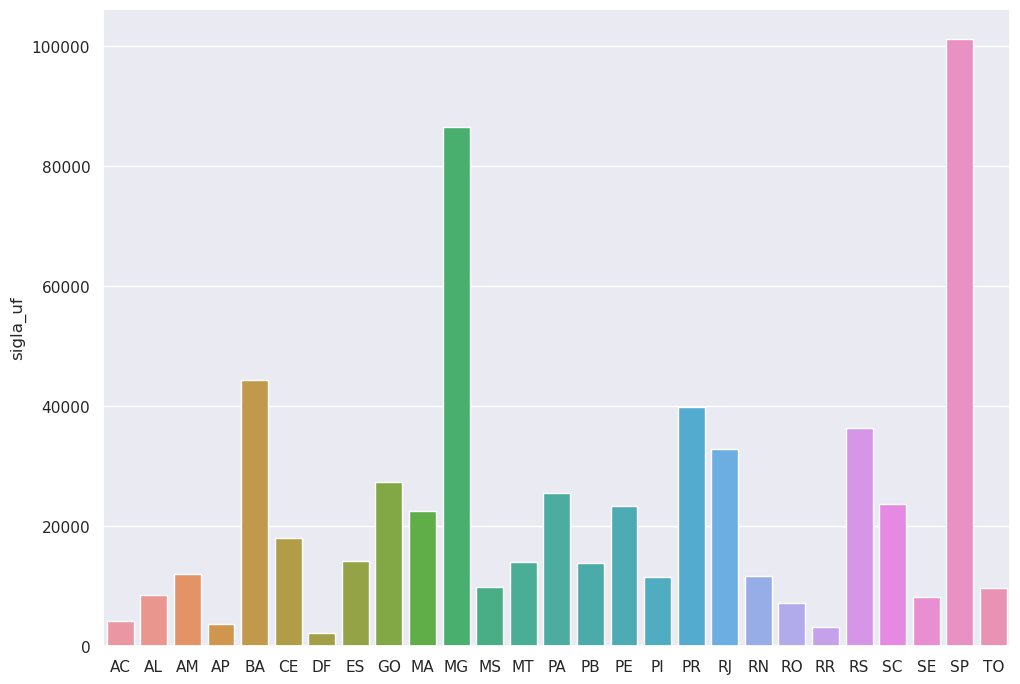

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x=x,y=y)

Pelo gráfico podemos visualizar que existe uma maior concentração de candidatos no estados de SP e MG, que são um dos dois maiores estados do Brasil. Minas Gerais (MG) contém 20,87 milhões milhões de habitantes (IBGE-2015) e São Paulo (SP) contém 44,04 milhões (IBGE-2014), dois grandes estados.

In [ ]:
del sigla

##### CPF

Cadastro de Pessoas Físicas (CPF) é um documento de identificação pessoal que é utilizado no Brasil. Novamente, como se trata de um atributo que é uma identificação do candidato ele pode ser retirado

In [ ]:
cpf = df['cpf']

In [ ]:
cpf

0         01333015160
1         32293593215
2         32307209204
3         32315457904
4         32317760230
             ...     
614347    42450101187
614348    01093944102
614349    38861925200
614350    43234100268
614351    59305495249
Name: cpf, Length: 614352, dtype: object

In [ ]:
remove_att.append('cpf')

In [ ]:
#COntrole de memória
del cpf

##### Nome

O nome do candidato não é tão relevante na hora da análise em si, mas como estes dados são reais, é muito importante manter esta coluna para poder fazer relações com o mundo real a partir dos resultados da análise, logo este atributo será mantido

In [ ]:
nome = df['nome']

In [ ]:
nome

0            Liziane Beatriz De Araújo Brauner
1                      Elivaldo Morais Da Cruz
2                         Ciro Campos De Souza
3            Ilda Ribeiro De Oliveira Olescove
4                    Gualder Girdeni Torreias 
                          ...                 
614347                     Jair Dos Reis Neiva
614348    Maria Ivoneide Conceição Da Silveira
614349                   Aldrin Nunes Torrinha
614350         Elisangela Maria Palheta Barata
614351          Maria Margarete De Sousa Silva
Name: nome, Length: 614352, dtype: object

In [ ]:
#Como esperado o nome é uma string
nome.dtype

dtype('O')

In [ ]:
del nome

##### Nome Urna

No Brasil, um candidato pode-se lançar a candidatura com um nome diferente de seu nome original, como um apelido ou um nome por o que ele é famoso, veja o exemplo abaixo

In [ ]:
nome_urna = df['nome_urna']

Aqui aparece duas vezes o nome "Lula" pois o candidato se lançou em 2018 e em 2022, resultando em duas partipações

In [ ]:
df[df['nome'] == 'Luiz Inácio Lula Da Silva']['nome_urna']

331803    Lula
485288    Lula
Name: nome_urna, dtype: object

Esta informação é redundante com o atributo nome, e pode ser removida, pois o nome do índividuo é mais representativo que seu "nome político"

In [ ]:
remove_att.append('nome_urna')

In [ ]:
del nome_urna

##### Sigla Partido

Este atributo é um dos mais importante deste conjunto de dados pois identifica a qual partido o candidato está ligado, que é algo muito útil na hora de realizar a análise de dados pois pode-se efetuar diversas relações e criar hipóteses, como por exemplo: Qual o partido com mais pessoas do genêro feminino? E qual a influência do Genêro para o atributo Silga-Partido?

In [ ]:
sigla_part = df['sigla_partido']

In [ ]:
sigla_part.unique()

array(['REDE', 'PPL', 'DC', 'PMB', 'PSTU', 'PCO', 'PCB', 'NOVO', 'AGIR',
       'UNIÃO', 'UP', 'PL', 'PP', 'PT', 'PV', 'DEM', 'MDB', 'PDT', 'PHS',
       'PMN', 'PRP', 'PSB', 'PSC', 'PSD', 'PSL', 'PTB', 'PTC', 'PODE',
       'PROS', 'PRTB', 'PSDB', 'PSOL', 'AVANTE', 'PC do B', 'PATRIOTA',
       'CIDADANIA', 'REPUBLICANOS', 'SOLIDARIEDADE'], dtype=object)

In [ ]:
sigla_part

0                  REDE
1                   PPL
2                  REDE
3                    DC
4                   PPL
              ...      
614347    SOLIDARIEDADE
614348    SOLIDARIEDADE
614349    SOLIDARIEDADE
614350    SOLIDARIEDADE
614351    SOLIDARIEDADE
Name: sigla_partido, Length: 614352, dtype: object

Felizmente não há valores NULOS para este atributo visto que é necessário um partido para se candidatar

In [ ]:
len(sigla_part.unique())

38

<AxesSubplot: ylabel='sigla_partido'>

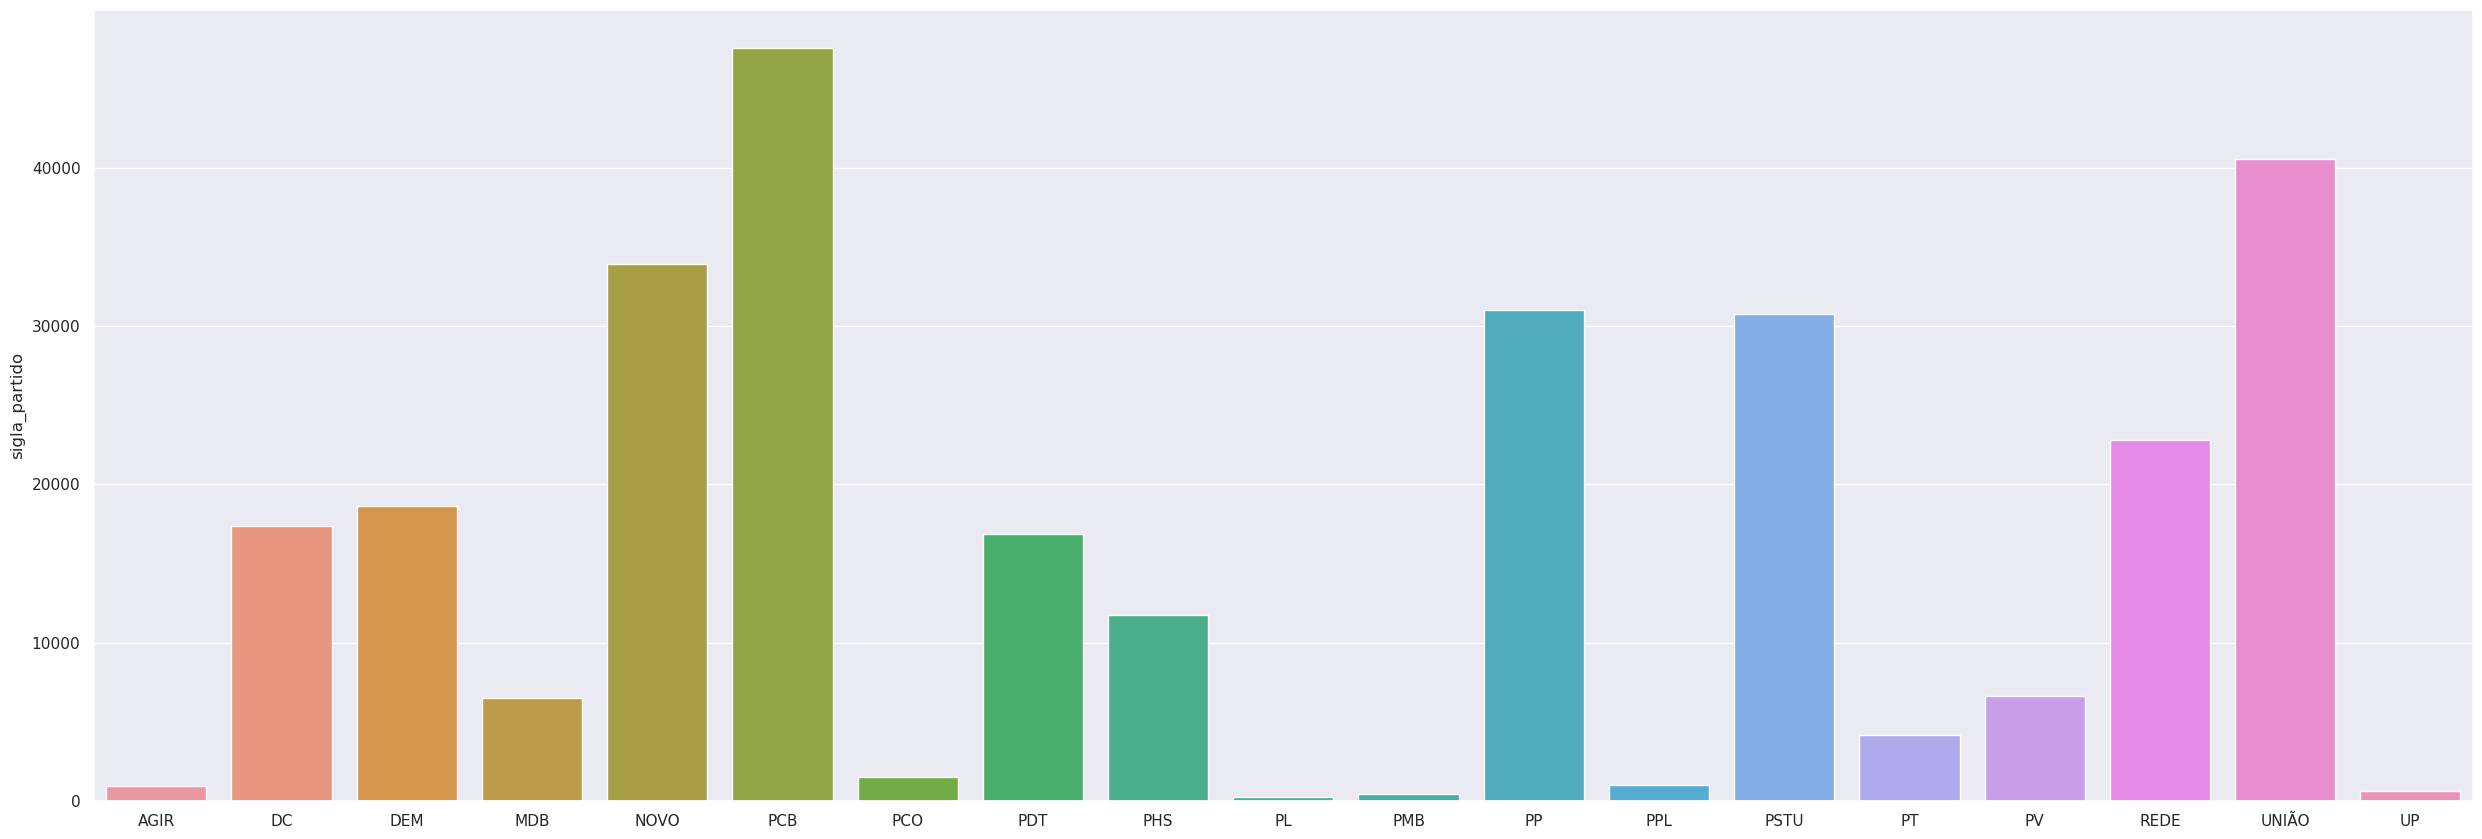

In [ ]:
#Remove o nan que é tratado como valor
x = np.sort(sigla_part.unique()[:19])
y = sigla_part.value_counts().sort_index()[:19]
sns.set(rc={'figure.figsize':(30.7,10.27)})
sns.barplot(x=x,y=y)

<AxesSubplot: ylabel='sigla_partido'>

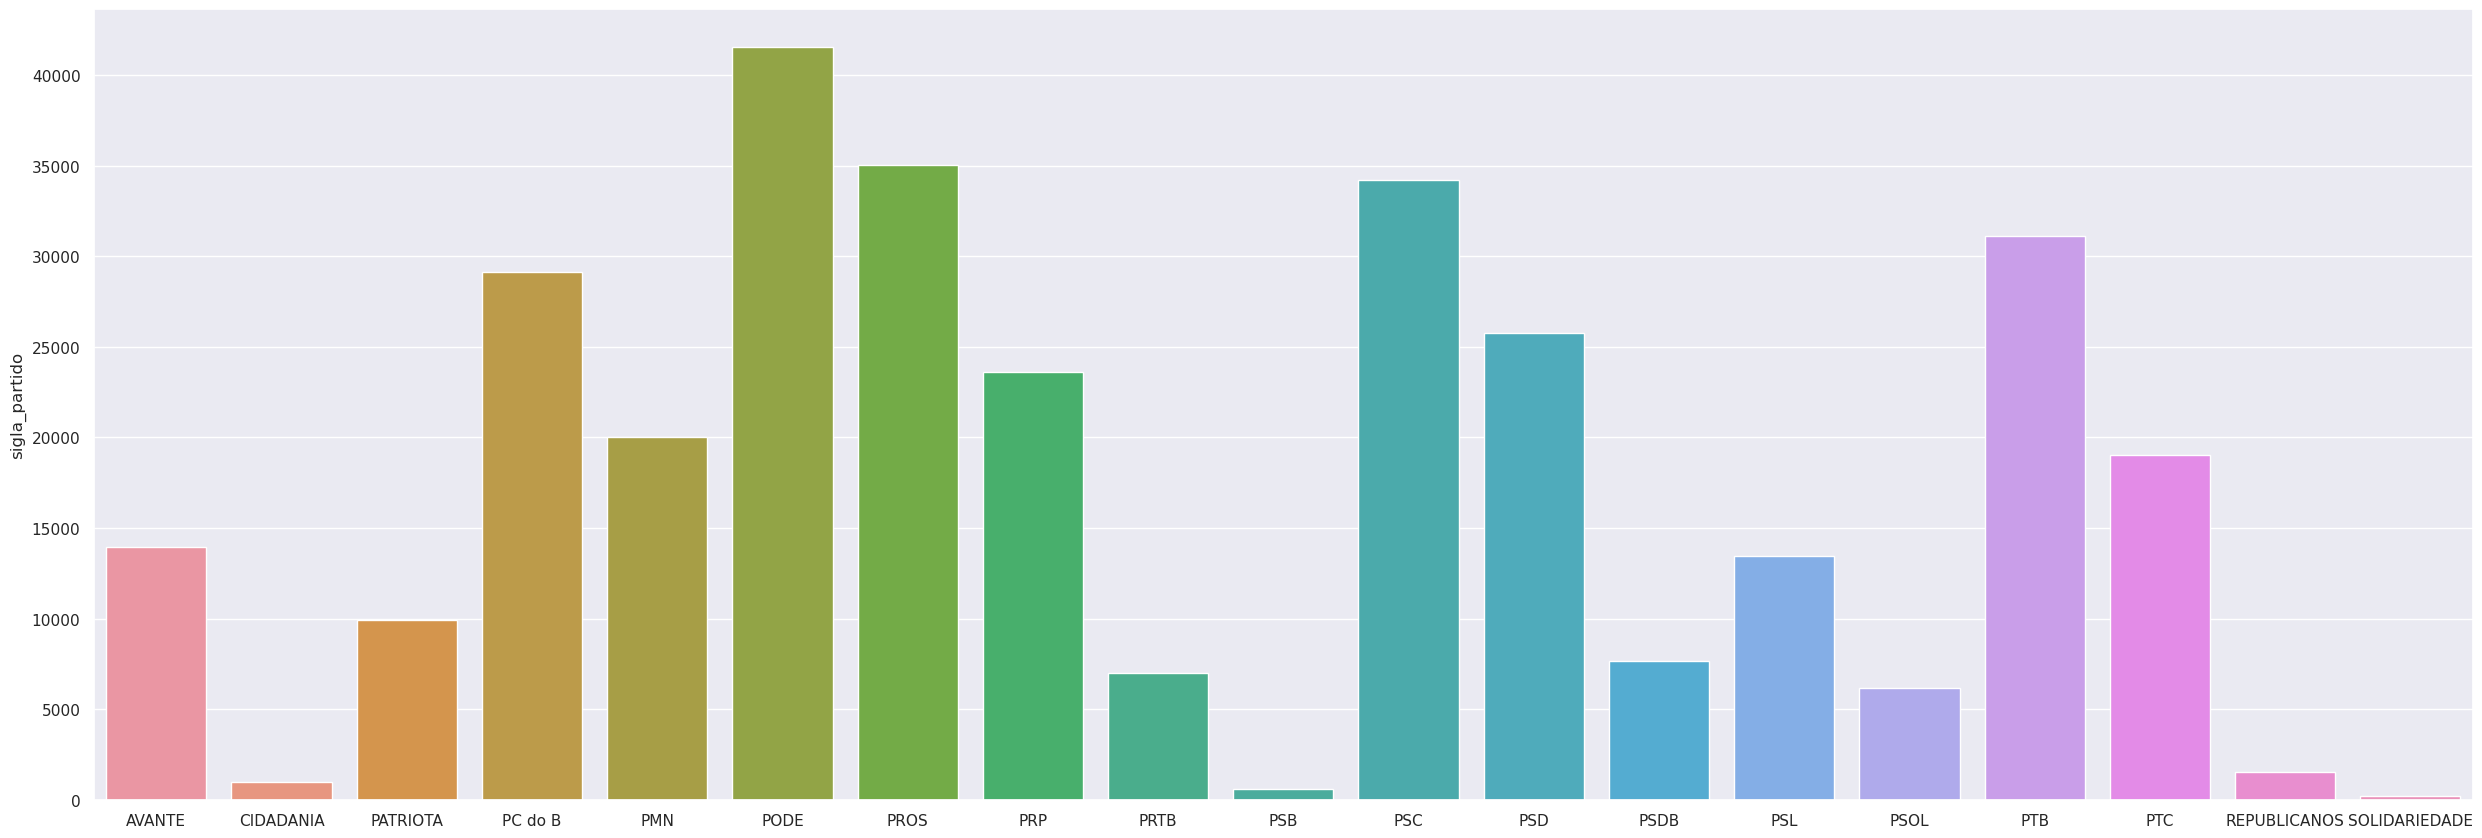

In [ ]:
#Remove o nan que é tratado como valor
x = np.sort(sigla_part.unique()[19:])
y = sigla_part.value_counts().sort_index()[19:]
sns.set(rc={'figure.figsize':(30.7,10.27)})
sns.barplot(x=x,y=y)

Devido a grande quantidade de partidos foi necessário dividir em dois para melhorar a visualização

In [ ]:
del sigla_part

##### Cargo

O cargo é também um dos principais atributos deste conjunto de dados, já que consegue mostrar qual o nível hierárquico do candidato e como isto está relacionado com suas outras características

Como por exemplo, uma possível consulta utilizando o cargo do candidato como base seria esta:

In [ ]:
df[(df['cargo'] == 'presidente') | (df['cargo'] == 'vice-presidente')]['raca'].value_counts() / df[(df['cargo'] == 'presidente') | (df['cargo'] == 'vice-presidente')]['raca'].value_counts().sum()

branca      0.725490
preta       0.156863
indigena    0.058824
parda       0.058824
Name: raca, dtype: float64

Esta consulta demostra que mais de 70% dos candidatos a presidente/vice-presidente se declaram como brancos, 15% se declaram como pretos, e apenas 0.05 se declaram como indigenas ou pardos

Como se trata de um atributo que diz respeito ao cargo que o candidato está se candidatando não há valores nulos

In [ ]:
cargo = df['cargo']

In [ ]:
cargo.unique()

array(['deputado distrital', 'deputado estadual', 'deputado federal',
       '2º suplente', '1º suplente', 'vice-governador', 'governador',
       'senador', 'presidente', 'vice-presidente', 'vereador',
       'vice-prefeito', 'prefeito'], dtype=object)

<AxesSubplot: ylabel='cargo'>

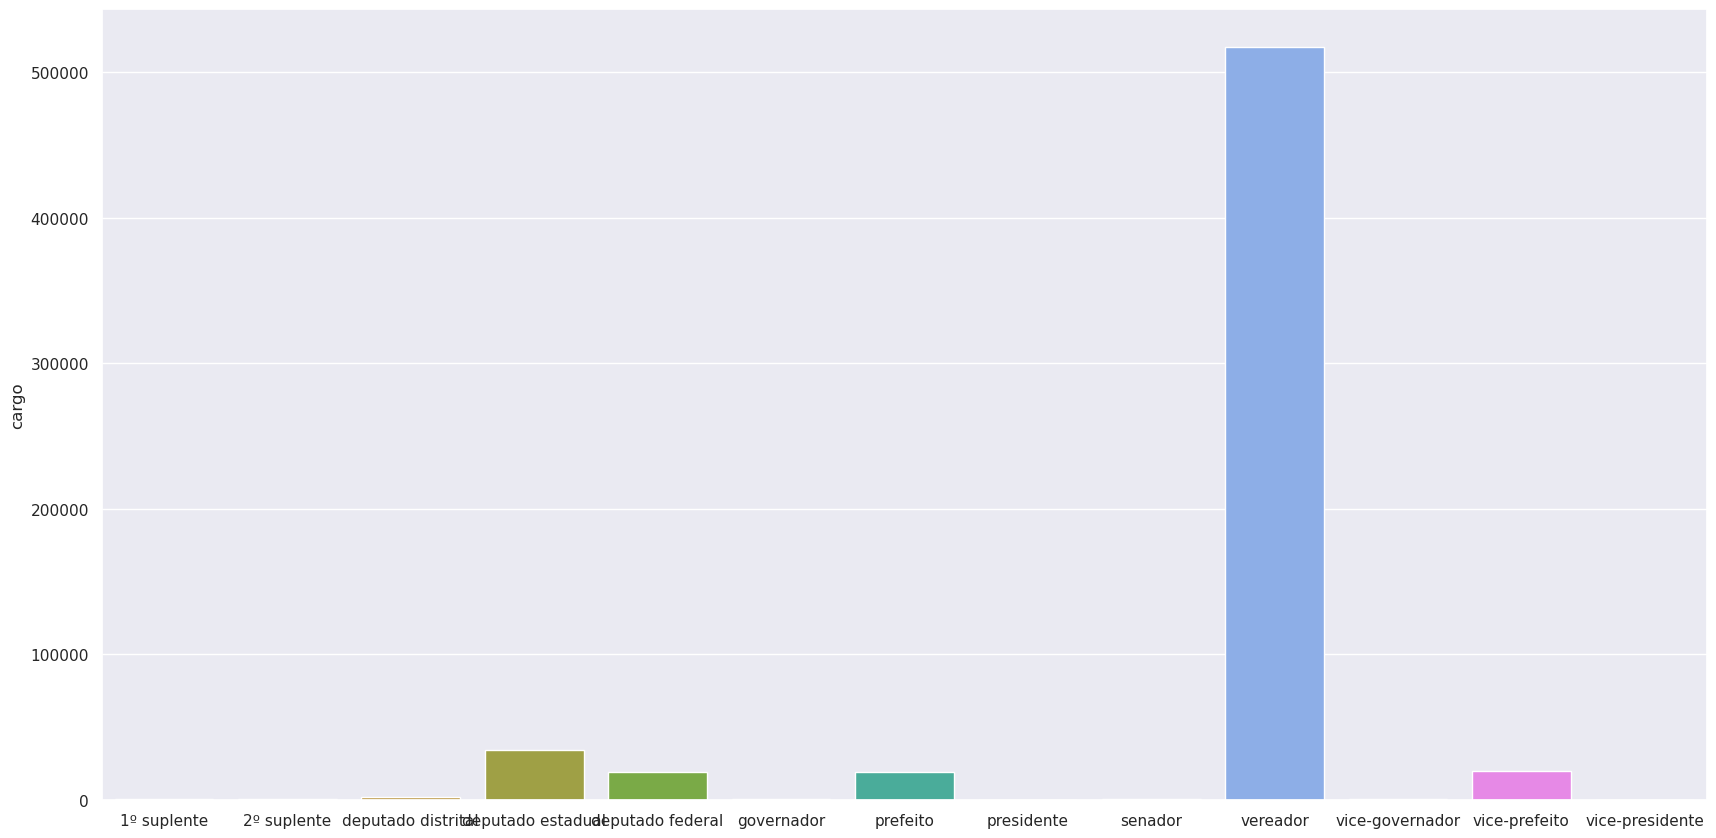

In [ ]:
#Remove o nan que é tratado como valor
x = np.sort(cargo.unique()[:19])
y = cargo.value_counts().sort_index()[:19]
sns.set(rc={'figure.figsize':(20.7,10.27)})
sns.barplot(x=x,y=y)

ESte gráfico demostra o esperado, como vereador é um cargo municipal e que elege mais de um por municipio, então é muito provável que a quantidade de pessoas que se candidatem ao cargo de vereador deve ser mais alta

In [ ]:
del cargo

##### Situação

Este atributo diz respeito a situação da candidatura do individuo, que pode ser algo válido de ser trabalhado, caso queira saber por exemplo: qual partido tem mais candidatos indeferidos?

Assim, é importante manter este atributo, mesmo que a sua visualização não seja representativa pois sozinhos os valores não são tão utéis

In [ ]:
situacao = df['situacao']

In [ ]:
#Possíveis valores da situação
situacao.unique()

array(['deferido', 'indeferido', 'renuncia', 'indeferido com recurso',
       'deferido com recurso', 'falecido', 'pedido nao conhecido',
       'cancelado', 'pedido nao conhecido com recurso',
       'pendente de julgamento', 'cassado', 'nao conhecimento do pedido',
       'aguardando julgamento', 'cassado com recurso', 'falecimento',
       'cancelado com recurso'], dtype=object)

In [ ]:
df['situacao'].value_counts()

deferido                            581705
indeferido                           18038
renuncia                             10692
indeferido com recurso                2324
deferido com recurso                   956
falecido                               194
pedido nao conhecido                   137
pendente de julgamento                  95
cassado                                 64
cancelado                               56
aguardando julgamento                   35
nao conhecimento do pedido              27
cassado com recurso                     15
pedido nao conhecido com recurso         8
falecimento                              5
cancelado com recurso                    1
Name: situacao, dtype: int64

Para a análise seria interessante remover alguns desses exemplos que possuem valores de situação diferente de deferido, para garantir que apenas os aceitos pelo TSE participarão da análise. Entretanto isto só será realizado na parte de pré-processamento de dados

Como se trata de uma característica obrigatória da candidatura é entendível não haver valores nulos

In [ ]:
del situacao

##### Ocupação

A ocupação é um atributo muito importante pois permite identificar o trabalho do candidato e com isso diversas relações podem ser entendidas

In [ ]:
ocup = df['ocupacao']

In [ ]:
ocup

0                                  servidor publico federal
1                                                    outros
2                                                   biologo
3               vendedor de comercio varejista e atacadista
4         locutor e comentarista de radio e televisao e ...
                                ...                        
614347                                               outros
614348                                             vereador
614349                                       policial civil
614350                                        administrador
614351                                manicure e maquilador
Name: ocupacao, Length: 614352, dtype: object

In [ ]:
len(ocup.unique())

254

Como foi verificado acima, o atributo OCUPACAO possui valores nulos que precisam ser tratados já que o atributo será utilizado. Para isso é importante verificar como os valores nulos estão dispostos e quem são eles

In [ ]:
df[ocup.isna()]

,ano,tipo_eleicao,sigla_uf,id_municipio,id_municipio_tse,id_candidato_bd,cpf,titulo_eleitoral,sequencial,numero,...,data_nascimento,idade,genero,instrucao,estado_civil,nacionalidade,sigla_uf_nascimento,municipio_nascimento,email,raca
109465,2022,eleicao ordinaria,MS,NaN,NaN,NaN,-4,-4,120001648881,90123,...,NaN,NaN,NaN,NaN,NaN,NaN,Não divulgável,NaN,NaN,NaN
109466,2022,eleicao ordinaria,MS,NaN,NaN,NaN,-4,-4,120001648884,90033,...,NaN,NaN,NaN,NaN,NaN,NaN,Não divulgável,NaN,NaN,NaN
109468,2022,eleicao ordinaria,MS,NaN,NaN,NaN,-4,-4,120001648885,90013,...,NaN,NaN,NaN,NaN,NaN,NaN,Não divulgável,NaN,NaN,NaN
109469,2022,eleicao ordinaria,MS,NaN,NaN,NaN,-4,-4,120001649120,9064,...,NaN,NaN,NaN,NaN,NaN,NaN,Não divulgável,NaN,NaN,NaN
109470,2022,eleicao ordinaria,MS,NaN,NaN,NaN,-4,-4,120001648886,90790,...,NaN,NaN,NaN,NaN,NaN,NaN,Não divulgável,NaN,NaN,NaN
142191,2022,eleicao ordinaria,DF,NaN,NaN,NaN,-4,-4,70001677310,100,...,NaN,NaN,NaN,NaN,NaN,NaN,Não divulgável,NaN,NaN,NaN
249082,2022,eleicao ordinaria,PE,NaN,NaN,NaN,-4,-4,170001736697,14888,...,NaN,NaN,NaN,NaN,NaN,NaN,Não divulgável,NaN,NaN,NaN
249083,2022,eleicao ordinaria,PE,NaN,NaN,NaN,-4,-4,170001736575,14300,...,NaN,NaN,NaN,NaN,NaN,NaN,Não divulgável,NaN,NaN,NaN
263285,2022,eleicao ordinaria,MS,NaN,NaN,NaN,-4,-4,120001649122,9009,...,NaN,NaN,NaN,NaN,NaN,NaN,Não divulgável,NaN,NaN,NaN
263287,2022,eleicao ordinaria,AM,NaN,NaN,NaN,-4,-4,40001719320,9099,...,NaN,NaN,NaN,NaN,NaN,NaN,Não divulgável,NaN,NaN,NaN


COmo pode verificar acima, os exemplos que possuem a ocupação NULA, contém diversos outros valores nulos e provavelmente deve ser explicativo pela grande quantidade de candidatos e provavelmente estes candidatos não foram deferidos

In [ ]:
df[ocup.isna()]['situacao']

109465                indeferido
109466                indeferido
109468                indeferido
109469                indeferido
109470                indeferido
142191                 cancelado
249082      pedido nao conhecido
249083      pedido nao conhecido
263285                indeferido
263287                indeferido
263288                indeferido
263289                  renuncia
290952      pedido nao conhecido
310127                indeferido
364158                  renuncia
411093                  renuncia
416758                indeferido
416759                indeferido
444672      pedido nao conhecido
462396                  deferido
467791                 cancelado
569926                indeferido
569927                indeferido
569928                  renuncia
586245    indeferido com recurso
Name: situacao, dtype: object

Como citado, todos os candidatos (exceto um) que não possuem a ocupação declarada não foram deferidos ou sofreram algum tipo de problema em sua candidatura. Este candidato que possui falta de vários valores será tratado na seção de Gênero.

##### Data_Nascimento

A data de nascimento de um candidato é algo relevante, mas como no conjunto de dados já temos o atributo IDADE não é tão util utilizar a data de nascimento já que a idade é bem mais simples de ser trabalhada

In [ ]:
remove_att.append('data_nascimento')

##### Gênero

O Genêro do indivíduo é uma característica muito importante pois permite realizar análises sociais sobre como estão dispostos os candidatos, cargos e partidos em relações a genêros difernetes

In [ ]:
genero  = df['genero']

In [ ]:
genero

0          feminino
1         masculino
2         masculino
3          feminino
4         masculino
            ...    
614347    masculino
614348     feminino
614349    masculino
614350     feminino
614351     feminino
Name: genero, Length: 614352, dtype: object

In [ ]:
genero.unique()

array(['feminino', 'masculino', nan], dtype=object)

Como foi visualizado acima, existem valores nulos para o atributo GENERO, oque é algo complexo de ser analisado. Pois os valores NULOS podem ter duas explicações.

1. Realmente não foi possível obter o Genêro do Candidato
2. O Genêro do Candidato não se enquadra nem em Masculino nem em Feminino

Com uma breve pesquisa, utilizando o nome dos candidatos disponibilizados abaixo, nota-se que a primeira hipótese se enquadra, visto que por exemplo, para a Candidata  Mary Emmilim Santos De Andrade, seu gênero está sem valor, entretanto, no link: https://diariodorio.com/eleicoes2022/mato-grosso-sul/candidato/deputado-estadual/emmilim-black-90033/ que é um jornal carioca, o gênero da candidata está descrito como Feminino.

In [ ]:
df[genero.isna()]['nome']

109465           Francisco Luciano Moura Neves
109466          Mary Emmilim Santos De Andrade
109468                  Luzia Pereira Da Silva
109469              Airton Farias Da Conceição
109470         Jonas Henrique Nogueira E Silva
142191             Manoel Coelho Arruda Junior
249082      Francisco De Assis Guedes Da Costa
249083        Gercinaldo Do Nascimento Barboza
263285                          Débora Quirino
263287               Adriana Moura De Mendonça
263288                 Rayane Oliveira Moreira
263289                Edson Dos Santos Fidelis
290952              Claudeci Xavier De Miranda
310127                     Paulo Cesar Pereira
364158               Rennan Biths De Lima Lima
411093      Rui Óscar De Souza Abrantes Guedes
416758                 Rauni Tartari Guimarães
416759            Mauro Wilson Amorim De Souza
444672          Benedito Aarão Sales De Araújo
462396      Paulo Roberto Roque Antonio Khouri
467791          Rosiane Chagas Mesquita Eguchi
569926       

Entretanto, novamente há um problema com a candidatura destes indivíduos. Como pode ser visto abaixo, quase todos (exceto por 1) não foram deferidos, e dessa forma, não estarão presente na análise, visto que é interessante abordar apenas os que foram deferidos

In [ ]:
df[genero.isna()]['situacao']

109465                indeferido
109466                indeferido
109468                indeferido
109469                indeferido
109470                indeferido
142191                 cancelado
249082      pedido nao conhecido
249083      pedido nao conhecido
263285                indeferido
263287                indeferido
263288                indeferido
263289                  renuncia
290952      pedido nao conhecido
310127                indeferido
364158                  renuncia
411093                  renuncia
416758                indeferido
416759                indeferido
444672      pedido nao conhecido
462396                  deferido
467791                 cancelado
569926                indeferido
569927                indeferido
569928                  renuncia
586245    indeferido com recurso
Name: situacao, dtype: object

Agora é necessário encontrar o exemplo que foi deferido mas possui o atributo GENERO NULO

In [ ]:
df[(genero.isna()) & (df['situacao'] == 'deferido')]

,ano,tipo_eleicao,sigla_uf,id_municipio,id_municipio_tse,id_candidato_bd,cpf,titulo_eleitoral,sequencial,numero,...,data_nascimento,idade,genero,instrucao,estado_civil,nacionalidade,sigla_uf_nascimento,municipio_nascimento,email,raca
462396,2018,eleicao ordinaria,DF,NaN,NaN,NaN,000000000-4,-4,70000602381,300,...,NaN,NaN,NaN,NaN,NaN,NaN,Não divulgável,Não Divulgável,NaN,NaN


Com uma breve pesquisa pode-se descobrir que como está descrito no link: https://eleicoes.poder360.com.br/candidato/1203680#2022 o candidato do partido novo se identifica como sendo do gênero Masculino, além de outras informações sobre ele que não estão presentes existirem

Abaixo podemos verificar como estão dispostos os genêros nesse conjunto de dados

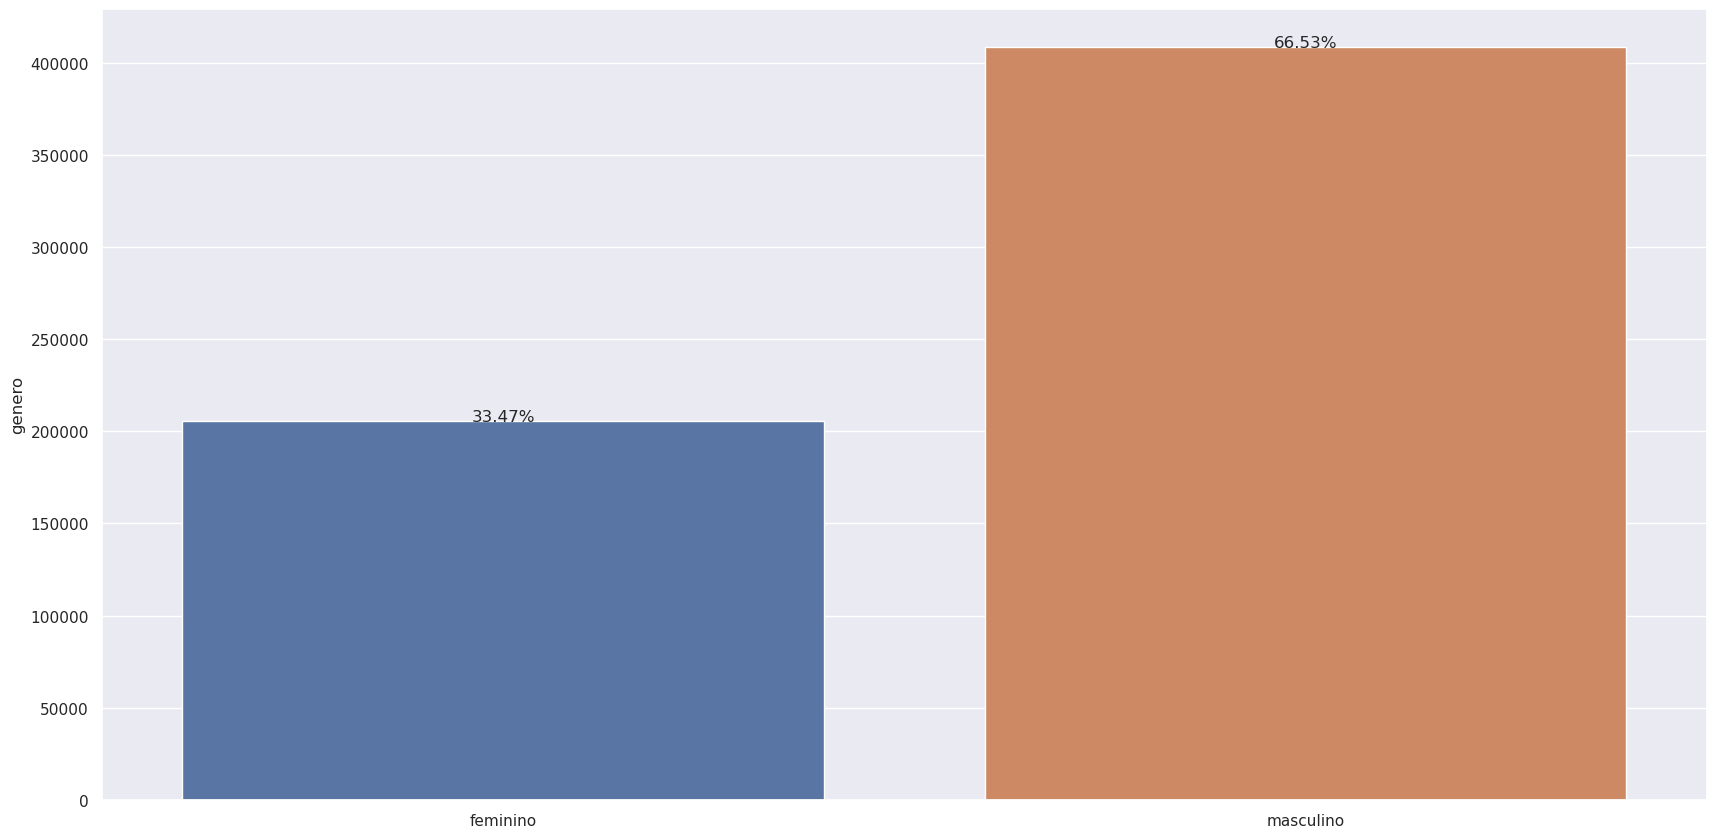

In [ ]:
#Remove o nan que é tratado como valor
x = np.sort(genero.unique()[:-1])
y = genero.value_counts().sort_index()
sns.set(rc={'figure.figsize':(20.7,10.27)})
p1 = sns.barplot(x=x,y=y)

patches = p1.patches
h = 0
for i in range(len(patches)):
    percentage = (y[h]) / (y[0] + y[1])
    h+= 1
    x = patches[i].get_x() + patches[i].get_width()/2
    y_l = patches[i].get_height()+.05
    p1.annotate(f'{100*percentage:.2f}%', (x, y_l), ha='center')

plt.show()


Como podemos verificar existe uma grande discrepância entre os gêneros dos candidatos, o que será explorado

##### Instrucao

A instrução de um candidatos é um campo muito importante para a futura a análise já que permite a identificação de padrões

In [ ]:
instrucao = df['instrucao']

Como mostrado acima o atributo instrução possui campos nulos que precisam ser tratados para que não haja problema

In [ ]:
df[instrucao.isna()]['situacao'] == 'deferido'

109465    False
109466    False
109468    False
109469    False
109470    False
142191    False
249082    False
249083    False
263285    False
263287    False
263288    False
263289    False
290952    False
310127    False
364158    False
411093    False
416758    False
416759    False
444672    False
462396     True
467791    False
569926    False
569927    False
569928    False
586245    False
Name: situacao, dtype: bool

Como podemos ver acima não há exemplos com a instrução nula e que tenha sido deferida pelo TSE, desta maneira não será necessário tratar isto, já que as instâncias que não foram deferidas serão removidas

<AxesSubplot: title={'center': 'Instrucao dos candidatos'}, ylabel='instrucao'>

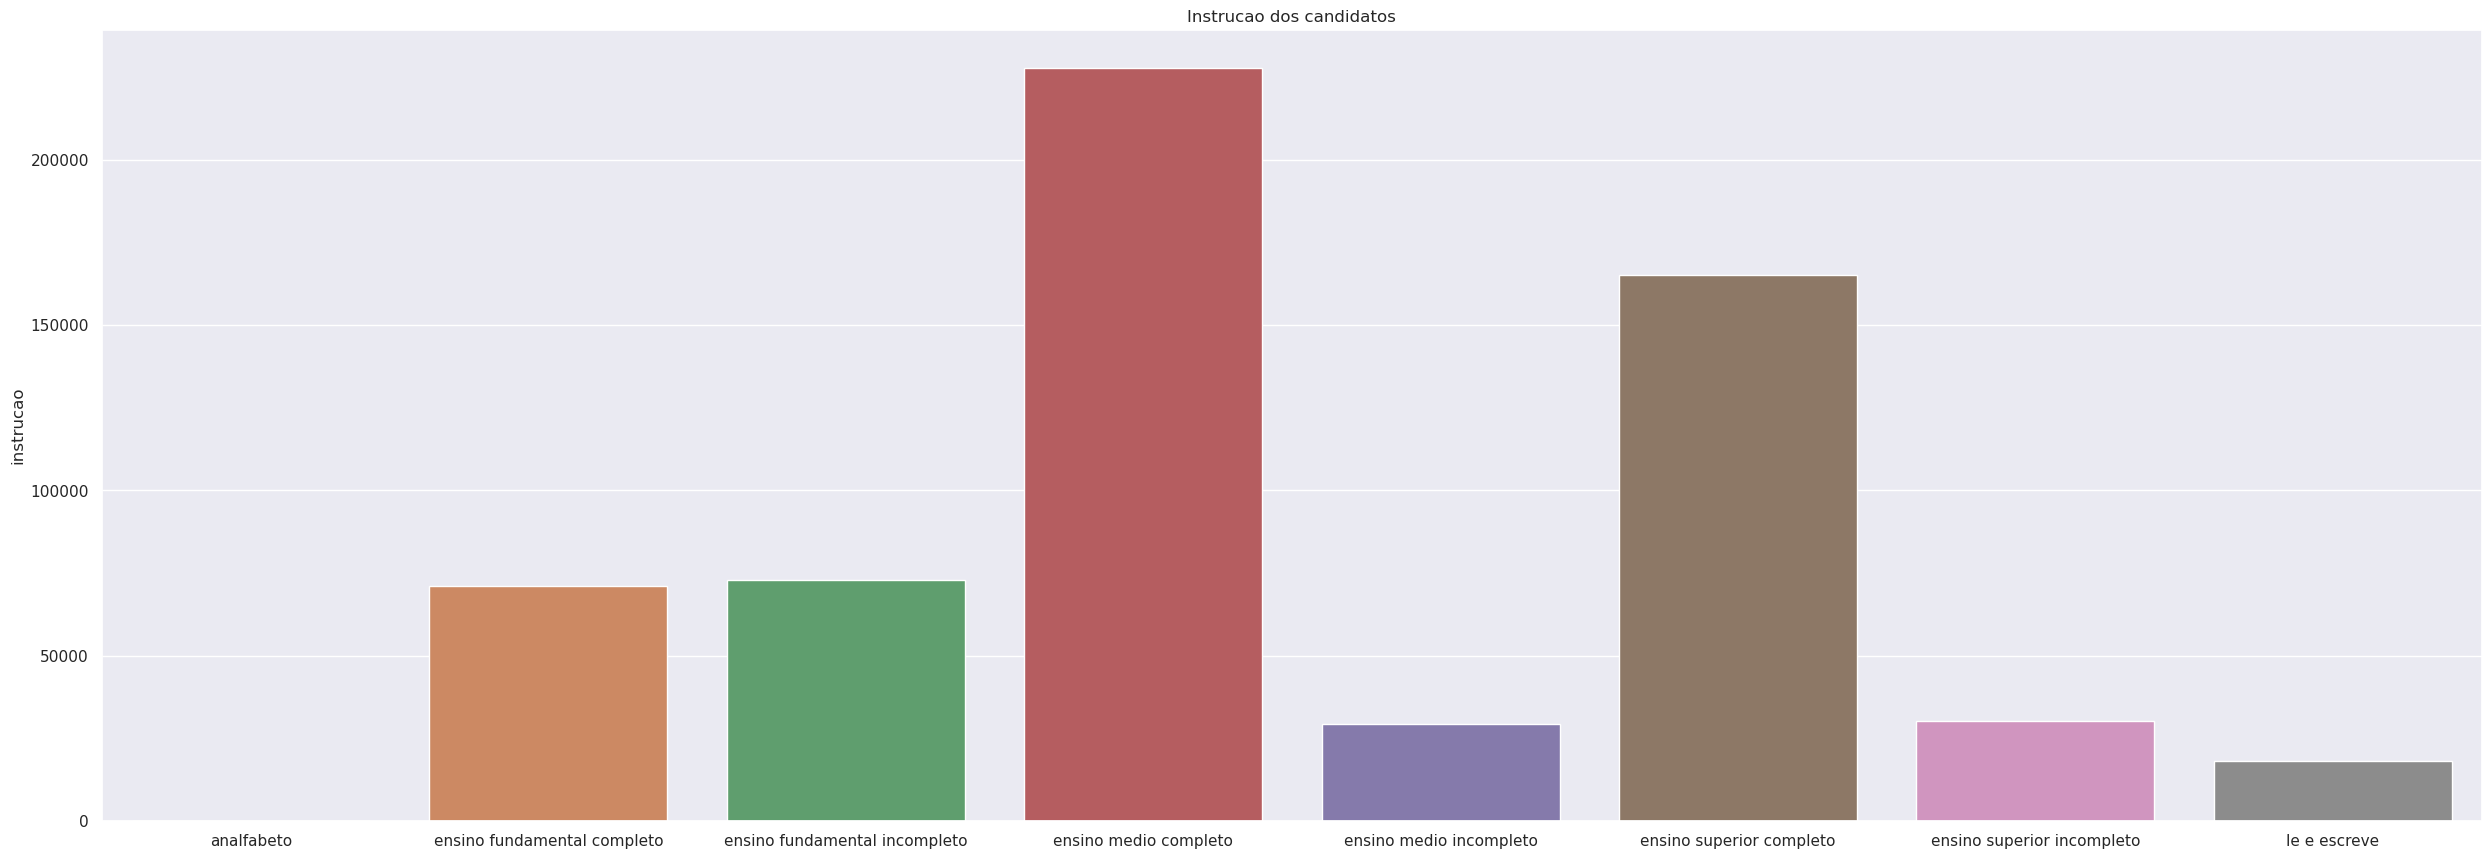

In [ ]:
#Remove o nan que é tratado como valor
x = np.sort(instrucao.unique()[:-1])
y = instrucao.value_counts().sort_index()
sns.set(rc={'figure.figsize':(30.7,10.27)})
plt.title("Instrucao dos candidatos")
sns.barplot(x=x,y=y)

In [ ]:
instrucao.unique()

array(['ensino superior completo', 'ensino medio completo',
       'ensino fundamental completo', 'ensino superior incompleto',
       'ensino fundamental incompleto', 'ensino medio incompleto',
       'le e escreve', 'analfabeto', nan], dtype=object)

##### Estado Civil

O estado civil de um candidato pode ser um atributo explorado, mas nesta análise não há necessidade de se trabalhar com ele pois não será utilizado

In [ ]:
df['estado_civil'].unique()

array(['divorciado(a)', 'casado(a)', 'solteiro(a)', 'viuvo(a)', nan],
      dtype=object)

In [ ]:
remove_att.append('estado_civil')

##### Nacionalidade

A nacionalidade de um candidato é uma característica importante dele, entretanto não é algo relevante para a análise e pode ser descartado

In [ ]:
df['nacionalidade'].unique()

array(['brasileira', 'brasileira (naturalizada)', 'estrangeiro',
       'portuguesa com igualdade de direitos', nan], dtype=object)

In [ ]:
remove_att.append('nacionalidade')

##### Sigla UF Nascimento

A SIGLA da UF do Nascimento de um candidato é algo importante, pois permite identificar a UF do candidato para fazer futuras análises, como por exemplo, qual a UF que mais houve candidatos a presidente?

In [ ]:
sigla_uf_nasc = df['sigla_uf_nascimento']

In [ ]:
sigla_uf_nasc.unique()

array(['RS', 'PI', 'PA', 'PR', 'RR', 'RO', 'GO', 'PE', 'BA', 'SP', 'RJ',
       'TO', 'MA', 'CE', 'AC', 'MT', 'SE', 'MG', 'RN', 'AL', 'MS', 'DF',
       'PB', 'AP', 'SC', 'AM', 'ES', 'ZZ', 'Não divulgável'], dtype=object)

O interessante é que ao ínves de Nulo, o conjunto de dados possui o Não divulgável, que é uma boa saída para lidar com os valores nulos, já que não é possível inventar uma UF de nascimento do candidato.

<AxesSubplot: title={'center': 'UF de Nascimento dos candidatos'}, ylabel='sigla_uf_nascimento'>

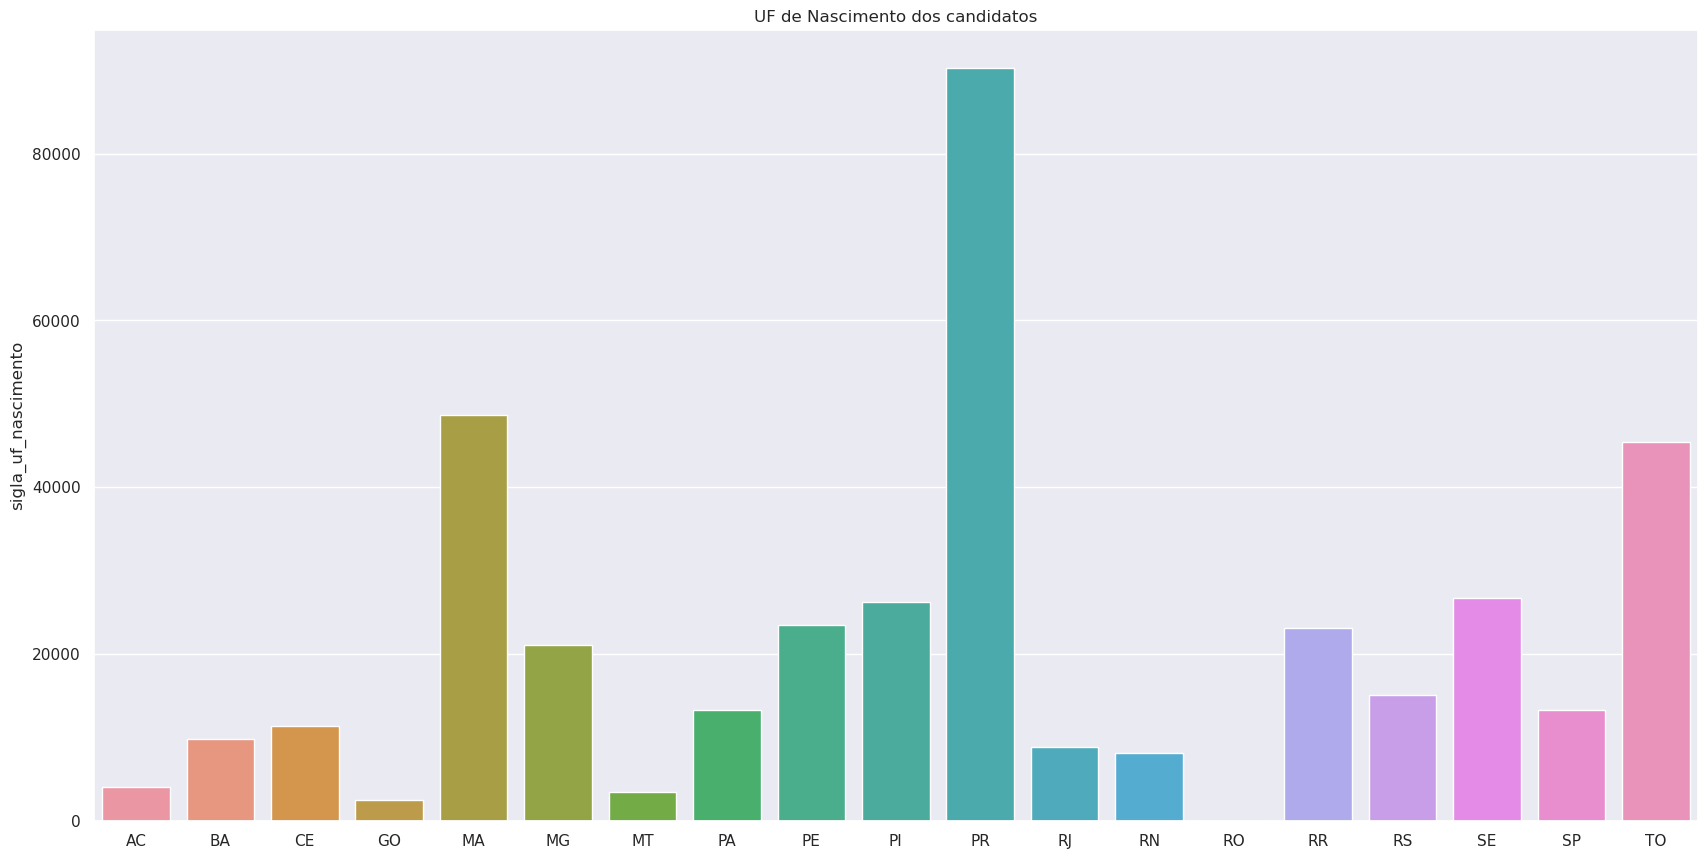

In [ ]:
#Remove o nan que é tratado como valor
x = np.sort(sigla_uf_nasc.unique()[:19])
y = sigla_uf_nasc.value_counts().sort_index()[:19]
sns.set(rc={'figure.figsize':(20.7,10.27)})
plt.title("UF de Nascimento dos candidatos")
sns.barplot(x=x,y=y)

Acima no gráfico podemos visualizar que a maioria dos candidatos nasceram no Paraná, algo bem interessante e nenhum um pouco intuitivo de se dizer

In [ ]:
del sigla_uf_nasc

##### Munícipio Nascimento

Mesmo a Sigla de UF de Nascimento sendo um atributo relevante o Municipio de nascimento por ser algo muito específico e um atributo que podem receber inúmeros valores é interessante remover o atributo

In [ ]:
len(df['municipio_nascimento'])

614352

In [ ]:
remove_att.append('municipio_nascimento')

##### Email

Este atributo é completamente irrelavante na análise já que não consegue promover nenhum tipo de resposta já que é apenas um método de contato

In [ ]:
remove_att.append('email')

##### Raça

Este atributo será muito utilizado para gerar relações e tentar responder algumas perguntas que serão formuladas

In [ ]:
raca = df['raca']

In [ ]:
raca

0         branca
1          parda
2          parda
3         branca
4          parda
           ...  
614347    branca
614348     parda
614349     parda
614350     parda
614351     parda
Name: raca, Length: 614352, dtype: object

Como visto o atributo raça possui muitos valores NULOS, entretanto pode-se realizar uma correção nisto. Como este atributo pode ter o valor "nao informado" então este valor será atributo aos exemplos que tiverem este valor NULO

In [ ]:
raca.unique()

array(['branca', 'parda', 'preta', 'indigena', 'amarela', 'nao informado',
       nan], dtype=object)

## 2. Preparação dos dados

Essa etapa é muito importante na análise de dados, pois permite que o conjunto de dados seja preparado para uma possível análise que será realiada utilizando o conjunto de dados

Para esta etapa ser realizada as proposições realizadas na seção anterior serão realizadas

Com isso, o dataset será arrumado e assim será possível manipulá-lo a usá-lo para tentar responder perguntas

### Correlação

Os atributos redundantes serão removidos.

Atributos redundantes são atributos que agregam a mesma informação/ contém os mesmo valores, e dessa maneira apenas um deles pode ser mantido, para que as dimensões do conjunto sejam reduzidas.

Uma maneira de verificar a presença de atributos redundantes é utilizando a correlação, cuja a fórmula está abaixo:

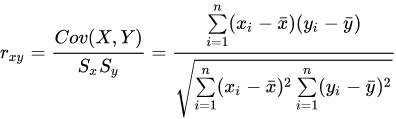

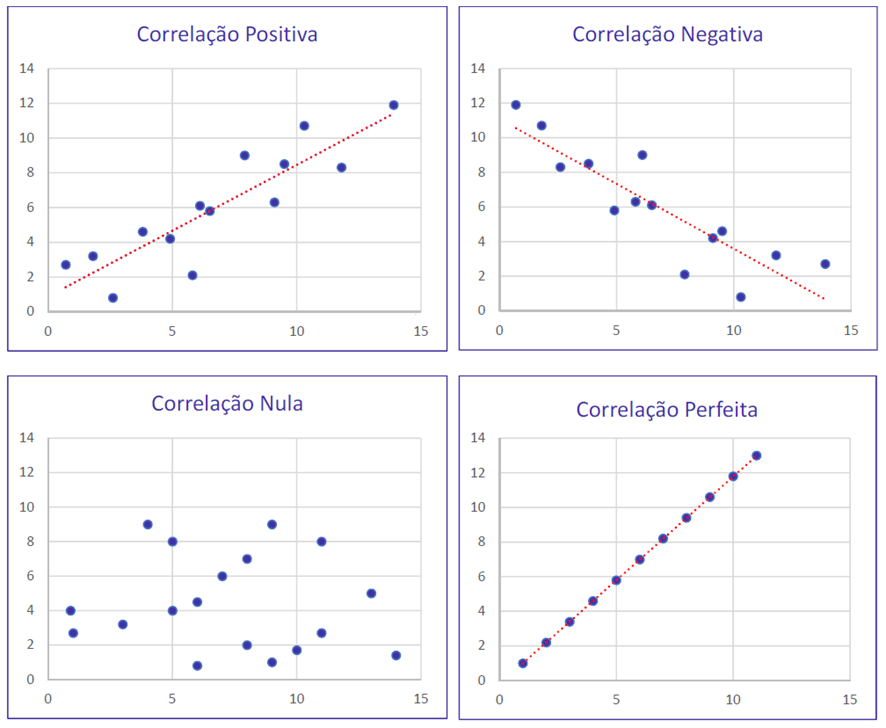

Acima, podemos compreender um pouco mais sobre correlação e como ela funciona.

A correlação positiva acontece quando dois atributos estão muito correlacionados e desta maneira há um indicativo de serem atributos redundantes e os valores de correlação se aproximam de 1.

A correlação negativa acontece quando dois atributos estão muito pouco correlacionados e desta maneira são atributos que contém uma relação inversa à correlação positiva, e assim, os valores de correlação se aproxima de -1

A correlação NULA acontece quando os atributos não contém uma relação entre si, e dessa maneira não estão correlacionados e os valores se aproximam muito de 0

Na tabela abaixo, pode-se verificar um pouco sobre a relaçao entre os coeficientes de correlação e o tipo de correlação dos atributos

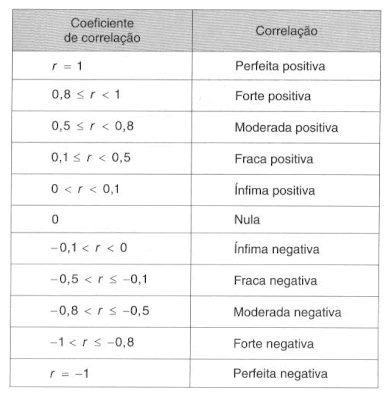

#### Atributos redundantes

In [ ]:
redundantes = []

In [ ]:
#Retriada/Identificação de atributos numéricos
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

df_numericas = df.select_dtypes(include=numerics)

In [ ]:
df_numericas

,ano,id_municipio,id_municipio_tse,id_candidato_bd,titulo_eleitoral,sequencial,numero,numero_partido,idade
0,2018,NaN,NaN,105.0,87699770400,70000612418,18007,18,33.0
1,2018,NaN,NaN,270.0,3011792682,230000605201,54300,54,48.0
2,2018,NaN,NaN,537.0,2718862631,230000615943,1888,18,46.0
3,2018,NaN,NaN,713.0,15458640647,160000629332,27115,27,62.0
4,2018,NaN,NaN,753.0,1159942615,230000605200,54444,54,48.0
...,...,...,...,...,...,...,...,...,...
614347,2020,5107156.0,98914.0,NaN,17330751805,110001242273,77123,77,60.0
614348,2020,1706506.0,73032.0,NaN,9329122798,270001151286,77789,77,64.0
614349,2020,1600303.0,6050.0,122692.0,1241842526,30001085422,77190,77,49.0
614350,2020,1600303.0,6050.0,193287.0,1456312585,30001085436,77677,77,47.0


In [ ]:
#Função que determina a correlação para cada par de atributos em todo o conjunto de dados e armazena em um novo dataframe
def correlacao(df):

    df_corr = pd.DataFrame(columns=['Nome Col 1', 'Nome Col 2', 'Correlação'])
    index = 0
    for coluna_x in df.columns:
        for coluna_y in df.columns:
            if coluna_x == coluna_y:
                continue
            cor = df[coluna_x].corr(df[coluna_y])
            df_corr.loc[index] = [coluna_x,coluna_y,cor]
            index += 1
    return df_corr

df_corr = correlacao(df_numericas)

In [ ]:
df_corr

,Nome Col 1,Nome Col 2,Correlação
0,ano,id_municipio,NaN
1,ano,id_municipio_tse,NaN
2,ano,id_candidato_bd,-0.000922
3,ano,titulo_eleitoral,0.012720
4,ano,sequencial,-0.001633
...,...,...,...
67,idade,id_candidato_bd,-0.083802
68,idade,titulo_eleitoral,-0.355246
69,idade,sequencial,0.053135
70,idade,numero,-0.054430


In [ ]:
df_corr.loc[0][2].dtype

dtype('float64')

In [ ]:
#Verificar quais correlações são NULAS
df_corr[df_corr['Correlação'].isna()]

,Nome Col 1,Nome Col 2,Correlação
0,ano,id_municipio,NaN
1,ano,id_municipio_tse,NaN
8,id_municipio,ano,NaN
16,id_municipio_tse,ano,NaN


Atributos com uma correlação positiva alta

In [ ]:
df_corr.sort_values(['Correlação'], ascending=False)[df_corr['Correlação'] > 0.85]

/tmp/ipykernel_4635/2748600479.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_corr.sort_values(['Correlação'], ascending=False)[df_corr['Correlação'] > 0.85]


,Nome Col 1,Nome Col 2,Correlação
9,id_municipio,id_municipio_tse,0.883387
17,id_municipio_tse,id_municipio,0.883387
62,numero_partido,numero,0.863809
54,numero,numero_partido,0.863809


Além da relação previamente verificada, os atributos 'id_municipio' e 'id_municipio_tse' estão muito relacionados e um deles pode ser removido.

In [ ]:
redundantes.append('id_municipio')

Além da relação previamente verificada, os atributos 'numero_partido' e 'numero' estão muito relacionados e um deles pode ser removido.

In [ ]:
redundantes.append('numero')

In [ ]:
#Remove atributos redundantes
df.drop(redundantes,axis=1,inplace=True)

#### Atributos irrelevantes

Agora, após a remoção dos atributos redundantes, os atributos que foram anteriormente julgados como irrelevantes para a posterior análise, também serão removidos

In [ ]:
remove_att

['ano',
 'titulo_eleitoral',
 'sequencial',
 'numero',
 'numero_partido',
 'id_municipio',
 'id_municipio_tse',
 'id_candidato_bd',
 'tipo_eleicao',
 'cpf',
 'nome_urna',
 'data_nascimento',
 'estado_civil',
 'nacionalidade',
 'municipio_nascimento',
 'email']

In [ ]:
redundantes

['id_municipio', 'numero']

In [ ]:
for i in remove_att:
    if i in redundantes:
        remove_att.remove(i)


In [ ]:
remove_att

['ano',
 'titulo_eleitoral',
 'sequencial',
 'numero_partido',
 'id_municipio_tse',
 'id_candidato_bd',
 'tipo_eleicao',
 'cpf',
 'nome_urna',
 'data_nascimento',
 'estado_civil',
 'nacionalidade',
 'municipio_nascimento',
 'email']

In [ ]:
df.drop(remove_att,axis=1,inplace=True)
df

,sigla_uf,nome,sigla_partido,cargo,situacao,ocupacao,idade,genero,instrucao,sigla_uf_nascimento,raca
0,DF,Liziane Beatriz De Araújo Brauner,REDE,deputado distrital,deferido,servidor publico federal,33.0,feminino,ensino superior completo,RS,branca
1,RR,Elivaldo Morais Da Cruz,PPL,deputado estadual,deferido,outros,48.0,masculino,ensino medio completo,PI,parda
2,RR,Ciro Campos De Souza,REDE,deputado federal,deferido,biologo,46.0,masculino,ensino superior completo,PA,parda
3,PR,Ilda Ribeiro De Oliveira Olescove,DC,deputado estadual,deferido,vendedor de comercio varejista e atacadista,62.0,feminino,ensino medio completo,PR,branca
4,RR,Gualder Girdeni Torreias,PPL,deputado estadual,deferido,locutor e comentarista de radio e televisao e ...,48.0,masculino,ensino fundamental completo,RR,parda
...,...,...,...,...,...,...,...,...,...,...,...
614347,MT,Jair Dos Reis Neiva,SOLIDARIEDADE,vereador,deferido,outros,60.0,masculino,ensino fundamental completo,MG,branca
614348,TO,Maria Ivoneide Conceição Da Silveira,SOLIDARIEDADE,vereador,deferido,vereador,64.0,feminino,ensino medio incompleto,TO,parda
614349,AP,Aldrin Nunes Torrinha,SOLIDARIEDADE,vereador,deferido,policial civil,49.0,masculino,ensino superior completo,AP,parda
614350,AP,Elisangela Maria Palheta Barata,SOLIDARIEDADE,vereador,deferido,administrador,47.0,feminino,ensino medio completo,PA,parda


Agora, o tratamento dos valores nulos precisará ser realizado

Para que seja possível verificar com facilidade os valores nulos, gera-se a tabela abaixo

In [ ]:
df.isna().sum()

sigla_uf                 51
nome                      0
sigla_partido             0
cargo                     0
situacao                  0
ocupacao                 25
idade                    32
genero                   25
instrucao                25
sigla_uf_nascimento       0
raca                   6378
dtype: int64

### Pré-Processamento

####  Tratando valores que não são deferidos

Isto será realizado pois é interessante analisar somente os candidatos que estão habilitados para se candidatar ao cargo, e desta maneira somente os deferidos devem ser mantidos, para que os que estavam em situação irregular ou foram indeferidos não atrapalhem

In [ ]:
df = df[df['situacao'] == 'deferido']

In [ ]:
df['situacao'].unique()

array(['deferido'], dtype=object)

In [ ]:
df.isna().sum()

sigla_uf                 48
nome                      0
sigla_partido             0
cargo                     0
situacao                  0
ocupacao                  1
idade                     7
genero                    1
instrucao                 1
sigla_uf_nascimento       0
raca                   6041
dtype: int64

#### Caso específico

In [ ]:
genero = df['genero']

In [ ]:
df[(genero.isna()) & (df['situacao'] == 'deferido')]['nome']

462396    Paulo Roberto Roque Antonio Khouri
Name: nome, dtype: object

Com uma breve pesquisa pode-se descobrir que como está descrito no link: https://eleicoes.poder360.com.br/candidato/1203680#2022 o candidato do partido novo se identifica como sendo do gênero Masculino, além de outras informações sobre ele que não estão presentes existirem

Mesmo não sendo uma técnica recomendada, como se trata de apenas um exemplo e as informações sobre este eram de facíl acesso serão adicionados novos valores que representem a realidade

In [ ]:
df[((genero.isna()) & (df['situacao'] == 'deferido'))].isna()

,sigla_uf,nome,sigla_partido,cargo,situacao,ocupacao,idade,genero,instrucao,sigla_uf_nascimento,raca
462396,False,False,False,False,False,True,True,True,True,False,True


In [ ]:
nro = df[((genero.isna()) & (df['situacao'] == 'deferido'))].index[0]

Acima, pode-se verificar que as seguintes colunas são nulas para este candidato:

1. id_municio
2. id_municipio_tse
3. id_candidato_bd
4. ocupacao
5. data_nascimento
6. idade
7. genero
8. instrucao
9. nacionalidade
10. email
11. raca

Entre estes, como apenas alguns serão aproveitados, vamos alterar os valores de:


1. ocupacao
2. idade
3. genero
4. instrucao
5. raca

In [ ]:
#Valores segundo o site https://eleicoes.poder360.com.br/candidato/1203680#2022
ocupacao = 'advogado'
idade = 55
gen = 'masculino'
instrucao = 'ensino superior completo'
raca = 'nao informado'

In [ ]:
df.loc[nro,'ocupacao'] = ocupacao
df.loc[nro,'idade'] = idade
df.loc[nro,'genero'] = gen
df.loc[nro,'instrucao'] = instrucao
df.loc[nro,'raca'] = raca


In [ ]:
df[((genero.isna()) & (df['situacao'] == 'deferido'))]

,sigla_uf,nome,sigla_partido,cargo,situacao,ocupacao,idade,genero,instrucao,sigla_uf_nascimento,raca


#### Tratando os valores nulos de Sigla_uf

A ideia sugerida era colocar 'sem sigla' nos valores NULOS, já que os exemplo que não contém uma sigla_uf são os presidentes/vice-presidentes, que obviamente não tem uma sigla uf, já que tem poder nacional e governam para o Brasil inteiro. Assim, esta será a maneira de tratamento

In [ ]:
df['sigla_uf'] = df['sigla_uf'].fillna('sem_sigla')

/tmp/ipykernel_4635/1833319992.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sigla_uf'] = df['sigla_uf'].fillna('sem_sigla')


In [ ]:
df.isna().sum()

sigla_uf                  0
nome                      0
sigla_partido             0
cargo                     0
situacao                  0
ocupacao                  0
idade                     6
genero                    0
instrucao                 0
sigla_uf_nascimento       0
raca                   6040
dtype: int64

#### Tratando os valores faltantes para idade

Como menos de 0.01% dos valores de idade são nulos, podemos simplesmente retirá-los.

In [ ]:
print(f"{df[(df['idade'].isna()) & (df['situacao'] == 'deferido') ].shape[0] / df.shape[0] * 100}% dos valores de idade são nulos")

0.001031450649384138% dos valores de idade são nulos


In [ ]:
df = df.dropna(subset=['idade'])

In [ ]:
df.isna().sum()

sigla_uf                  0
nome                      0
sigla_partido             0
cargo                     0
situacao                  0
ocupacao                  0
idade                     0
genero                    0
instrucao                 0
sigla_uf_nascimento       0
raca                   6040
dtype: int64

#### Tratando os valores faltantes para raca

Como já citado, o atributo raça possui muitos valores NULOS, mas também possui um dos possíveis valores como sendo "não informado" em que o candidato preferiu não especificar sua raca, dessa forma, podemos propor que os exemplos que possuem o atributo raca NULO, também prefiriram não informar por não se sentirem confortáveis ou por outros fatores.

Assim, o que será realizado é a atriuto de "nao informado" aos exemplos NULOS

In [ ]:
print(df['raca'].unique())
valor = 'nao informado'

['branca' 'parda' 'preta' 'indigena' 'amarela' 'nao informado' nan]


In [ ]:
df['raca'].fillna(valor,inplace=True)

In [ ]:
df.isna().sum()

sigla_uf               0
nome                   0
sigla_partido          0
cargo                  0
situacao               0
ocupacao               0
idade                  0
genero                 0
instrucao              0
sigla_uf_nascimento    0
raca                   0
dtype: int64

Após isto, o pré-processamento está feito e agora a parte da análise e visualização de dados pode ser realizada sem problema nenhum.

## 3. Análise Descritiva

A análise descritiva busca fazer perguntas a respeito do datase e procura respondê-las através dos próprios dados presentes no conjunto, com o intuito de gerar insights e elaborar inferências a seu respeito.

Assim, devemos gerar algumas perguntas que possam ser respondidas com a análise do dataset. Dessa maneira, as seguintes perguntas foram formuladas:

  1. Qual a proporção de candidatos por partido?
  2. Qual a proporção de gênero para cada cargo eleitoral?
  3. Qual a proporção de raça por cada partido?
  4. Qual a relação de idade com o cargo eleitoral?
  5. Qual a relação da instrução do candidato por cargo eleitoral?


### Candidatos por partido

Para iniciar a análise vamos verificar qual a disposição dos candidatos por partido.

In [ ]:
candidatos_partido = df.groupby('sigla_partido')['nome'].count().sort_values()
candidatos_partido

sigla_partido
PCO                127
UP                 191
PCB                231
PPL                504
PSTU               537
AGIR               788
PRP                858
PHS                892
UNIÃO             1413
NOVO              1483
PMB               3569
DC                5758
REDE              5815
PMN               6039
PSOL              6552
PTC               6934
PRTB              8936
PC do B          10986
PV               12753
PROS             12912
PATRIOTA         15748
AVANTE           16267
CIDADANIA        17762
SOLIDARIEDADE    17997
PSC              19038
PODE             21626
PSL              22241
PTB              24379
PSB              27809
PL               29465
PDT              29606
REPUBLICANOS     29772
PT               32289
DEM              32556
PSDB             33453
PP               38958
PSD              39890
MDB              45565
Name: nome, dtype: int64

### Genêro por partido

Outra análise interessante a se fazer é a relação de cargos dos candidatos com o gênero:

In [ ]:
def porcentagem_genero(series):
    a=0
    soma=0
    porcentagem=[]
    for i in series:
        a+=1
        soma=soma+i
        if a==2:
            porcentagem.append(float(format(i/soma*100,'.2f')))
            a=0
            soma=0
    return porcentagem

In [ ]:
# Organizando a porcentagem das mulheres por cargo
cargo_genero = df.groupby('cargo')['genero'].value_counts()
porcentagem = porcentagem_genero(cargo_genero)
index=cargo_genero.keys()

novo=[]
a=0
for i in range(len(index)):
    if i%2==1:
        #print(index[i][0]," : ", porcentagem[a],'%')
        novo.append((index[i][0], porcentagem[a]))
        a+=1

# Ordenando a lista
novo.sort(key = lambda x: x[1])

# Pegando o index e sua porcentagem ordenada
index_sg=[]
porcentagem_sorted=[]

for i in range(len(novo)):
    index_sg.append(novo[i][0])
    porcentagem_sorted.append(novo[i][1])
    
cargo_feminino = pd.Series(data=porcentagem_sorted, index=index_sg)

Como pode-se observar a representatividade do gênero feminino em relação a cada cargo é baixa, chegando como o mínimo de 13.54% para o cargo de prefeito e no máximo de 39.32% para o cargo de vice-governador. Ainda mais que, segundo o IBGE de 2021, a porcentagem de mulheres no Brasil é de 51,1%, ou seja, as candidatas nos cargos políticos não refletem a distribuição da população.

### Raça por partido

Outra relação interessante a observar é a distribuição de raça por partido, analisando os partidos mais inclusivos e os mais seletivos. Para fins de análise, conforme mencionado anteriormente, há um número de candidatos que declararam sua raça como não informados, porém para termos uma dimensionalidade de cada classe, iremos considerar apenas aqueles que fizem sua declaração dessa característica, visto que os não declarados representam apenas 1% do espaço amostral.

In [ ]:
test = df.groupby('sigla_partido')['raca'].value_counts()
from pandas import DataFrame
from IPython.display import HTML
HTML(DataFrame(test).to_html())

In [ ]:
# Total de pessoas que não informara sua raça
nao_informados = df[df['raca']=='nao informado'].groupby('raca')['nome'].count()
nao_informados

raca
nao informado    6153
Name: nome, dtype: int64

In [ ]:
# Total de pessoas
total = df['nome'].count()
total

581699

In [ ]:
# Porcentagem dos não informados
format(int(nao_informados[0])/total, '.2f')

'0.01'

In [ ]:
# Removendo os não informados
df.drop(df[df['raca']=='nao informado'].index, inplace=True)

In [ ]:
# Relação de raça por partido
from pandas import DataFrame
from IPython.display import HTML

partido_raca = df.groupby('sigla_partido')['raca'].value_counts()
HTML(DataFrame(partido_raca).to_html())

In [ ]:
# Calculado o total de pessoas por partido
total_partido_ = df.groupby('sigla_partido')['nome'].count()
total_partido_

total_partido = []
for i in range(len(total_partido_)):
    total_partido.append((total_partido_.keys()[i], int(total_partido_[i])))
total_partido.sort()
total_partido

[('AGIR', 764),
 ('AVANTE', 16050),
 ('CIDADANIA', 17544),
 ('DC', 5671),
 ('DEM', 32197),
 ('MDB', 45199),
 ('NOVO', 1482),
 ('PATRIOTA', 15559),
 ('PC do B', 10874),
 ('PCB', 230),
 ('PCO', 127),
 ('PDT', 29310),
 ('PHS', 892),
 ('PL', 29139),
 ('PMB', 3523),
 ('PMN', 5926),
 ('PODE', 21366),
 ('PP', 38641),
 ('PPL', 504),
 ('PROS', 12782),
 ('PRP', 858),
 ('PRTB', 8833),
 ('PSB', 27535),
 ('PSC', 18752),
 ('PSD', 39409),
 ('PSDB', 33055),
 ('PSL', 22090),
 ('PSOL', 6543),
 ('PSTU', 537),
 ('PT', 31949),
 ('PTB', 24085),
 ('PTC', 6853),
 ('PV', 12638),
 ('REDE', 5751),
 ('REPUBLICANOS', 29551),
 ('SOLIDARIEDADE', 17723),
 ('UNIÃO', 1413),
 ('UP', 191)]

In [ ]:
# Total de pretos por partido
partido_pretos = []
for i in range(len(partido_raca)):
    if partido_raca.keys()[i][1]=='preta':
        partido_pretos.append((partido_raca.keys()[i], int(partido_raca[i])))
partido_pretos.sort()
partido_pretos

[(('AGIR', 'preta'), 107),
 (('AVANTE', 'preta'), 1974),
 (('CIDADANIA', 'preta'), 1754),
 (('DC', 'preta'), 679),
 (('DEM', 'preta'), 2909),
 (('MDB', 'preta'), 3630),
 (('NOVO', 'preta'), 46),
 (('PATRIOTA', 'preta'), 1667),
 (('PC do B', 'preta'), 2064),
 (('PCB', 'preta'), 48),
 (('PCO', 'preta'), 21),
 (('PDT', 'preta'), 3006),
 (('PHS', 'preta'), 79),
 (('PL', 'preta'), 2665),
 (('PMB', 'preta'), 509),
 (('PMN', 'preta'), 717),
 (('PODE', 'preta'), 2095),
 (('PP', 'preta'), 3240),
 (('PPL', 'preta'), 77),
 (('PROS', 'preta'), 1458),
 (('PRP', 'preta'), 100),
 (('PRTB', 'preta'), 869),
 (('PSB', 'preta'), 3102),
 (('PSC', 'preta'), 2011),
 (('PSD', 'preta'), 3598),
 (('PSDB', 'preta'), 2760),
 (('PSL', 'preta'), 2035),
 (('PSOL', 'preta'), 1796),
 (('PSTU', 'preta'), 228),
 (('PT', 'preta'), 5745),
 (('PTB', 'preta'), 2211),
 (('PTC', 'preta'), 867),
 (('PV', 'preta'), 1368),
 (('REDE', 'preta'), 926),
 (('REPUBLICANOS', 'preta'), 3278),
 (('SOLIDARIEDADE', 'preta'), 2033),
 (('UN

In [ ]:
# Total de pardos por partido
partido_pardos = []
for i in range(len(partido_raca)):
    if partido_raca.keys()[i][1]=='parda':
        partido_pardos.append((partido_raca.keys()[i], int(partido_raca[i])))
partido_pardos.sort()
partido_pardos

[(('AGIR', 'parda'), 319),
 (('AVANTE', 'parda'), 6959),
 (('CIDADANIA', 'parda'), 7051),
 (('DC', 'parda'), 2428),
 (('DEM', 'parda'), 12698),
 (('MDB', 'parda'), 16219),
 (('NOVO', 'parda'), 217),
 (('PATRIOTA', 'parda'), 6104),
 (('PC do B', 'parda'), 5169),
 (('PCB', 'parda'), 54),
 (('PCO', 'parda'), 22),
 (('PDT', 'parda'), 11372),
 (('PHS', 'parda'), 396),
 (('PL', 'parda'), 11610),
 (('PMB', 'parda'), 1594),
 (('PMN', 'parda'), 2777),
 (('PODE', 'parda'), 8439),
 (('PP', 'parda'), 14784),
 (('PPL', 'parda'), 189),
 (('PROS', 'parda'), 5838),
 (('PRP', 'parda'), 348),
 (('PRTB', 'parda'), 3309),
 (('PSB', 'parda'), 11065),
 (('PSC', 'parda'), 8578),
 (('PSD', 'parda'), 15998),
 (('PSDB', 'parda'), 11321),
 (('PSL', 'parda'), 7866),
 (('PSOL', 'parda'), 2044),
 (('PSTU', 'parda'), 62),
 (('PT', 'parda'), 12240),
 (('PTB', 'parda'), 9023),
 (('PTC', 'parda'), 3162),
 (('PV', 'parda'), 4967),
 (('REDE', 'parda'), 2341),
 (('REPUBLICANOS', 'parda'), 12549),
 (('SOLIDARIEDADE', 'pard

In [ ]:
# Transformando a lista de duplas em Séries
def pair_list_to_series(pair_list):
    index=[]
    item=[]
    for i in pair_list:
        index.append(i[0])
        item.append(i[1])
    series=pd.Series(data=item, index=index)
    return series

In [ ]:
# Relação percentual de pretos e pardos por partido
percentual_pretos_pardos = []
for i in range(len(total_partido)):
    percentual_pretos_pardos.append((total_partido[i][0], float(format(((partido_pretos[i][1]+partido_pardos[i][1])/total_partido[i][1])*100,'.2f'))))
percentual_pretos_pardos.sort(key = lambda x: x[1])
s_percentual_pretos_pardos=pair_list_to_series(percentual_pretos_pardos)
s_percentual_pretos_pardos

NOVO             17.75
PCO              33.86
PSDB             42.60
MDB              43.91
PCB              44.35
PSL              44.82
PP               46.64
PTB              46.64
PRTB             47.30
UNIÃO            47.77
DEM              48.47
PL               48.99
PDT              49.05
PODE             49.30
PSD              49.72
PATRIOTA         49.95
PV               50.13
CIDADANIA        50.19
PSB              51.45
PRP              52.21
PPL              52.78
PHS              53.25
REPUBLICANOS     53.56
PSTU             54.00
DC               54.79
AVANTE           55.66
SOLIDARIEDADE    55.72
AGIR             55.76
PT               56.29
PSC              56.47
REDE             56.81
PROS             57.08
PSOL             58.69
PTC              58.79
PMN              58.96
PMB              59.69
PC do B          66.52
UP               67.02
dtype: float64

In [ ]:
# Relação percentual de pretos por partido
percentual_pretos = []
for i in range(len(total_partido)):
    percentual_pretos.append((total_partido[i][0], float(format((partido_pretos[i][1]/total_partido[i][1])*100,'.2f'))))
percentual_pretos.sort(key = lambda x: x[1])
s_percentual_pretos=pair_list_to_series(percentual_pretos)
s_percentual_pretos

NOVO              3.10
MDB               8.03
PSDB              8.35
PP                8.38
PHS               8.86
DEM               9.04
PSD               9.13
PL                9.15
PTB               9.18
PSL               9.21
PODE              9.81
PRTB              9.84
CIDADANIA        10.00
PDT              10.26
UNIÃO            10.33
PATRIOTA         10.71
PSC              10.72
PV               10.82
REPUBLICANOS     11.09
PSB              11.27
PROS             11.41
SOLIDARIEDADE    11.47
PRP              11.66
DC               11.97
PMN              12.10
AVANTE           12.30
PTC              12.65
AGIR             14.01
PMB              14.45
PPL              15.28
REDE             16.10
PCO              16.54
PT               17.98
PC do B          18.98
PCB              20.87
PSOL             27.45
UP               37.70
PSTU             42.46
dtype: float64

In [ ]:
# Relação percentual de pardos por partido
percentual_pardos = []
for i in range(len(total_partido)):
    percentual_pardos.append((total_partido[i][0], float(format((partido_pardos[i][1]/total_partido[i][1])*100,'.2f'))))
percentual_pardos.sort(key = lambda x: x[1])
s_percentual_pardos=pair_list_to_series(percentual_pardos)
s_percentual_pardos

PSTU             11.55
NOVO             14.64
PCO              17.32
PCB              23.48
UP               29.32
PSOL             31.24
PSDB             34.25
PSL              35.61
MDB              35.88
UNIÃO            37.44
PRTB             37.46
PTB              37.46
PPL              37.50
PP               38.26
PT               38.31
PDT              38.80
PATRIOTA         39.23
PV               39.30
DEM              39.44
PODE             39.50
PL               39.84
CIDADANIA        40.19
PSB              40.19
PRP              40.56
PSD              40.59
REDE             40.71
AGIR             41.75
REPUBLICANOS     42.47
DC               42.81
AVANTE           43.36
SOLIDARIEDADE    44.25
PHS              44.39
PMB              45.25
PROS             45.67
PSC              45.74
PTC              46.14
PMN              46.86
PC do B          47.54
dtype: float64

Segundo dados do IBGE de 2021 a população preta representa 9,1% da população brasileira e a população parda 47%, assim observamos que no geral essas populações estão bem representadas entre os cadidatos de cada partido. Em que para fins de análise consideramos os casos com acima de 8% de seus representantes pretos e 37% de representantes pardos.

In [ ]:
# Todos os partidos
partidos = df['sigla_partido'].unique()
print(partidos)
len(partidos)

['REDE' 'PPL' 'DC' 'PSTU' 'PMB' 'PCO' 'PCB' 'NOVO' 'AGIR' 'UNIÃO' 'UP'
 'PL' 'PP' 'PT' 'PV' 'DEM' 'MDB' 'PDT' 'PHS' 'PMN' 'PRP' 'PSB' 'PSC' 'PSD'
 'PSL' 'PTB' 'PTC' 'PODE' 'PROS' 'PRTB' 'PSDB' 'PSOL' 'AVANTE' 'PC do B'
 'PATRIOTA' 'CIDADANIA' 'REPUBLICANOS' 'SOLIDARIEDADE']


38

In [ ]:
# Partidos com pessoas amarelas
partidos_amarelos=df[df['raca']=='amarela'].groupby('sigla_partido')['nome'].count()
partidos_amarelos=np.array(partidos_amarelos.keys())
partidos_amarelos

array(['AGIR', 'AVANTE', 'CIDADANIA', 'DC', 'DEM', 'MDB', 'NOVO',
       'PATRIOTA', 'PC do B', 'PCB', 'PDT', 'PHS', 'PL', 'PMB', 'PMN',
       'PODE', 'PP', 'PPL', 'PROS', 'PRP', 'PRTB', 'PSB', 'PSC', 'PSD',
       'PSDB', 'PSL', 'PSOL', 'PSTU', 'PT', 'PTB', 'PTC', 'PV', 'REDE',
       'REPUBLICANOS', 'SOLIDARIEDADE', 'UNIÃO'], dtype=object)

In [ ]:
# Partidos sem pessoas amarelas
list(set(partidos) - set(partidos_amarelos))

['UP', 'PCO']

In [ ]:
# Partidos com indigenas
partidos_indigenas=df[df['raca']=='indigena'].groupby('sigla_partido')['nome'].count()
partidos_indigenas=np.array(partidos_indigenas.keys())
partidos_indigenas

array(['AGIR', 'AVANTE', 'CIDADANIA', 'DC', 'DEM', 'MDB', 'NOVO',
       'PATRIOTA', 'PC do B', 'PCB', 'PDT', 'PHS', 'PL', 'PMB', 'PMN',
       'PODE', 'PP', 'PPL', 'PROS', 'PRP', 'PRTB', 'PSB', 'PSC', 'PSD',
       'PSDB', 'PSL', 'PSOL', 'PSTU', 'PT', 'PTB', 'PTC', 'PV', 'REDE',
       'REPUBLICANOS', 'SOLIDARIEDADE', 'UNIÃO', 'UP'], dtype=object)

In [ ]:
# Partidos sem indigenas
list(set(partidos) - set(partidos_indigenas))

['PCO']

### Idade por cargo de ocupação

Outro dado interessante a ser analisado é o de idade por cargo de ocupação:

In [ ]:
# Relação de idade por cargo
from pandas import DataFrame
from IPython.display import HTML

idade_cargo = df.groupby('cargo')['idade'].value_counts()
HTML(DataFrame(idade_cargo).to_html())

In [ ]:
# Média de Idades
media_idade=df.groupby('cargo')['idade'].mean()
media_idade=media_idade.sort_values()
media_idade

cargo
vereador              45.513526
deputado distrital    47.554158
deputado estadual     47.745706
deputado federal      48.778072
vice-prefeito         49.004773
prefeito              49.862345
vice-governador       50.864230
governador            52.073107
2º suplente           53.188825
1º suplente           53.615534
senador               55.057312
vice-presidente       56.125000
presidente            59.541667
Name: idade, dtype: float64

In [ ]:
# Idade mais jovem de um candidato
df['idade'].min()

18.0

In [ ]:
# Cargo o qual os candidatos mais jovens ocupam
df[df['idade']==18].groupby('cargo').count()

,sigla_uf,nome,sigla_partido,situacao,ocupacao,idade,genero,instrucao,sigla_uf_nascimento,raca
cargo,,,,,,,,,,
vereador,321,321,321,321,321,321,321,321,321,321


In [ ]:
# Idade mais velha de um candidato
df['idade'].max()

100.0

In [ ]:
# Cargo do candidato mais velho
df[df['idade']==100]

,sigla_uf,nome,sigla_partido,cargo,situacao,ocupacao,idade,genero,instrucao,sigla_uf_nascimento,raca
534903,AM,Maria Angela Pereira,PSC,vereador,deferido,outros,100.0,feminino,ensino medio incompleto,AM,parda


In [ ]:
# Cargo dos candidatos com mais de 90 anos
df[df['idade']>90].groupby('cargo')['nome'].count().sort_values()

cargo
prefeito              1
vice-prefeito         1
deputado estadual     2
deputado federal      2
vereador             17
Name: nome, dtype: int64

In [ ]:
# Cargo dos candidatos com mais de 80 à 90 anos
df[(df['idade']>80) & (df['idade']<90)].groupby('cargo')['nome'].count().sort_values()

cargo
presidente             1
vice-governador        1
2º suplente            3
governador             3
1º suplente            4
senador                6
prefeito              43
deputado estadual     46
deputado federal      46
vice-prefeito         60
vereador             443
Name: nome, dtype: int64

### Instrução do candidato por cargo eleitoral

Ao fim da análise, outro tópico observado foi o de instrução por cargo eleitoral:

In [ ]:
# Relação de Instrução por cargo eleitoral
from pandas import DataFrame
from IPython.display import HTML

instrucao_cargo_ = df.groupby('cargo')['instrucao'].value_counts()
HTML(DataFrame(instrucao_cargo_).to_html())

In [ ]:
instrucao_cargo = []
for i in range(len(instrucao_cargo_)):
    instrucao_cargo.append((instrucao_cargo_.keys()[i][0], instrucao_cargo_.keys()[i][1], instrucao_cargo_[i]))
instrucao_cargo

[('1º suplente', 'ensino superior completo', 356),
 ('1º suplente', 'ensino medio completo', 96),
 ('1º suplente', 'ensino superior incompleto', 28),
 ('1º suplente', 'ensino fundamental completo', 15),
 ('1º suplente', 'ensino fundamental incompleto', 9),
 ('1º suplente', 'ensino medio incompleto', 7),
 ('1º suplente', 'le e escreve', 4),
 ('2º suplente', 'ensino superior completo', 331),
 ('2º suplente', 'ensino medio completo', 114),
 ('2º suplente', 'ensino superior incompleto', 29),
 ('2º suplente', 'ensino fundamental completo', 14),
 ('2º suplente', 'ensino medio incompleto', 13),
 ('2º suplente', 'ensino fundamental incompleto', 12),
 ('2º suplente', 'le e escreve', 6),
 ('deputado distrital', 'ensino superior completo', 862),
 ('deputado distrital', 'ensino medio completo', 319),
 ('deputado distrital', 'ensino superior incompleto', 130),
 ('deputado distrital', 'ensino fundamental completo', 58),
 ('deputado distrital', 'ensino medio incompleto', 32),
 ('deputado distrital', 

In [ ]:
# Total de candidatos por cargo
total_cargo_ = df.groupby('cargo')['nome'].count()

total_cargo = []
for i in range(len(total_cargo_)):
    total_cargo.append((total_cargo_.keys()[i], int(total_cargo_[i])))
total_cargo.sort()
total_cargo

[('1º suplente', 515),
 ('2º suplente', 519),
 ('deputado distrital', 1431),
 ('deputado estadual', 31267),
 ('deputado federal', 17001),
 ('governador', 383),
 ('prefeito', 17878),
 ('presidente', 24),
 ('senador', 506),
 ('vereador', 487387),
 ('vice-governador', 383),
 ('vice-prefeito', 18228),
 ('vice-presidente', 24)]

In [ ]:
# Porcentagem de instrução por cargo
porcentagem_cargo = []
a=0
for cargo in instrucao_cargo:
    while cargo[0]!=total_cargo[a][0]:
        a+=1
    porcentagem_cargo.append((cargo[0], cargo[1], float(format(cargo[2]/float(total_cargo[a][1])*100, '.2f'))))
    a=0
porcentagem_cargo

[('1º suplente', 'ensino superior completo', 69.13),
 ('1º suplente', 'ensino medio completo', 18.64),
 ('1º suplente', 'ensino superior incompleto', 5.44),
 ('1º suplente', 'ensino fundamental completo', 2.91),
 ('1º suplente', 'ensino fundamental incompleto', 1.75),
 ('1º suplente', 'ensino medio incompleto', 1.36),
 ('1º suplente', 'le e escreve', 0.78),
 ('2º suplente', 'ensino superior completo', 63.78),
 ('2º suplente', 'ensino medio completo', 21.97),
 ('2º suplente', 'ensino superior incompleto', 5.59),
 ('2º suplente', 'ensino fundamental completo', 2.7),
 ('2º suplente', 'ensino medio incompleto', 2.5),
 ('2º suplente', 'ensino fundamental incompleto', 2.31),
 ('2º suplente', 'le e escreve', 1.16),
 ('deputado distrital', 'ensino superior completo', 60.24),
 ('deputado distrital', 'ensino medio completo', 22.29),
 ('deputado distrital', 'ensino superior incompleto', 9.08),
 ('deputado distrital', 'ensino fundamental completo', 4.05),
 ('deputado distrital', 'ensino medio inco

In [ ]:
# Total de ensino superior por cargo
superior_cargo = []
for i in range(len(porcentagem_cargo)):
    if porcentagem_cargo[i][1]=='ensino superior completo':
        superior_cargo.append((porcentagem_cargo[i][0], porcentagem_cargo[i][2]))
superior_cargo.sort(key = lambda x: x[1])
s_superior_cargo=pair_list_to_series(superior_cargo)
s_superior_cargo

vereador               22.78
vice-prefeito          42.46
deputado estadual      48.25
prefeito               56.44
deputado federal       57.20
deputado distrital     60.24
2º suplente            63.78
1º suplente            69.13
vice-governador        77.02
senador                83.40
presidente             87.50
governador             89.56
vice-presidente       100.00
dtype: float64

## 4. Visualização

Para a vizualização dos dados foi utilizado diversos gráficos pra sua representação, como se segue abaixo. Sendo o primeiro analisa o total de candidatos por partido:

<AxesSubplot: title={'center': 'Candidatos por Partido'}, xlabel='Partidos', ylabel='Candidatos'>

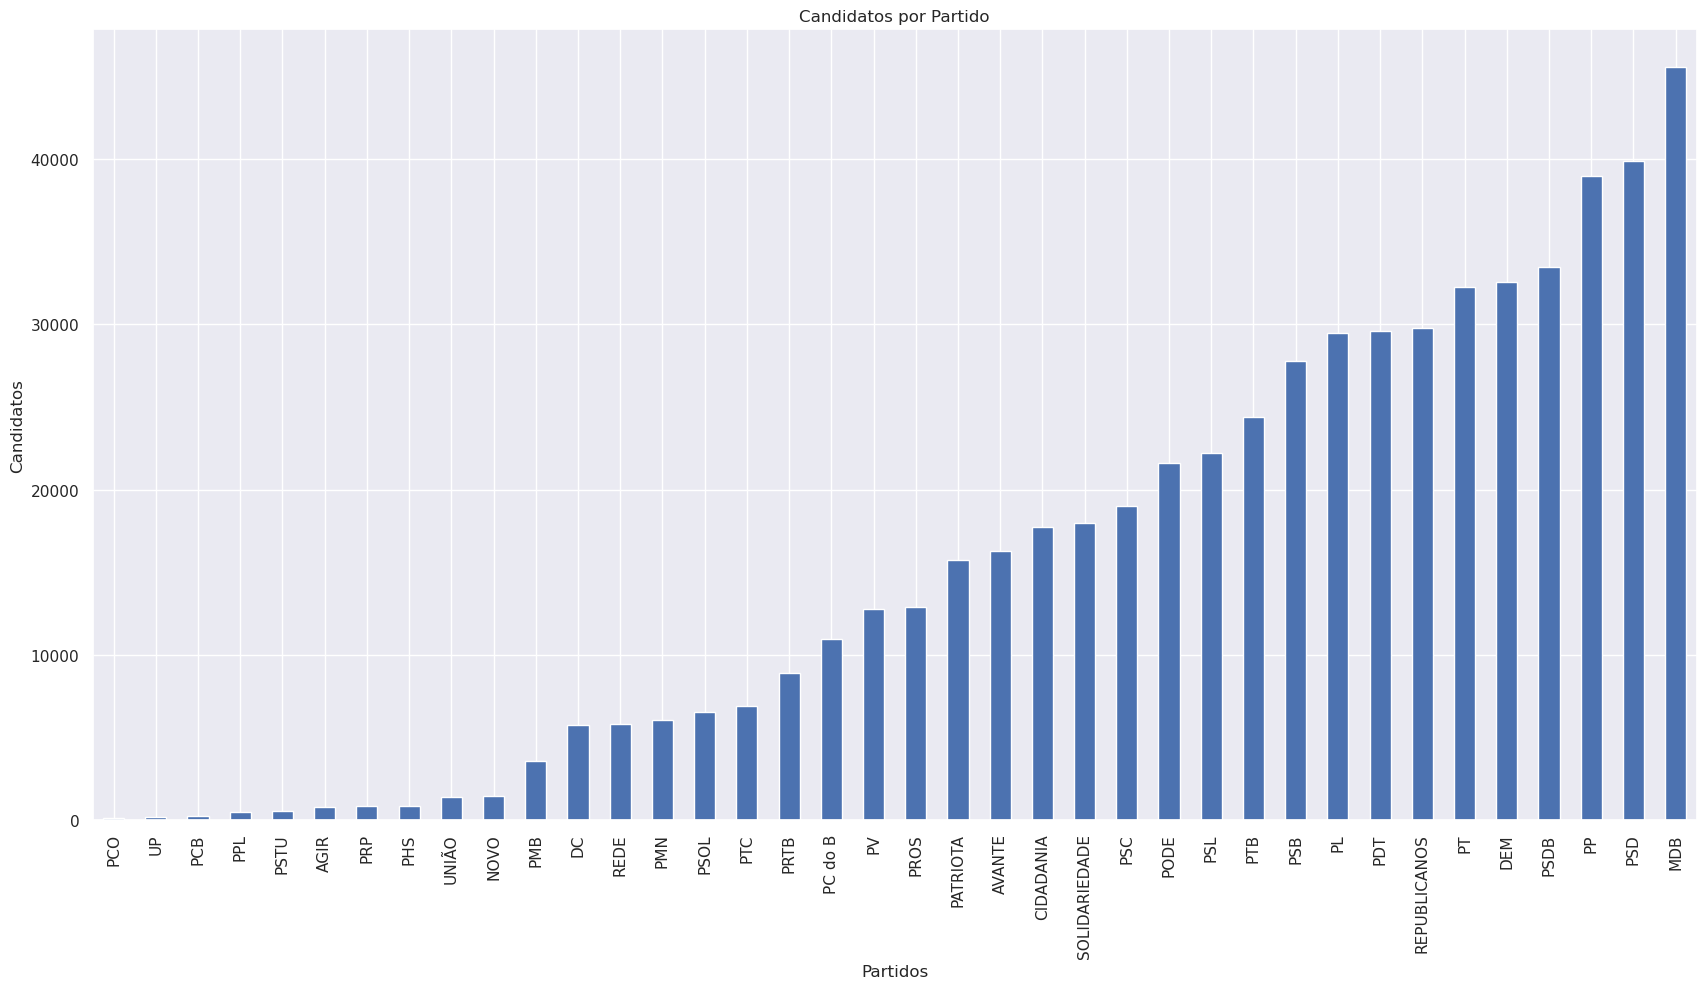

In [ ]:
candidatos_partido.plot(xlabel='Partidos', ylabel='Candidatos', title='Candidatos por Partido', kind='bar')

In [ ]:
candidatos_partido.describe()

count       38.000000
mean     15307.868421
std      13478.444030
min        127.000000
25%       2004.500000
50%      12832.500000
75%      26951.500000
max      45565.000000
Name: nome, dtype: float64

<AxesSubplot: title={'center': 'Mulheres por Cargo'}, xlabel='Cargo Eleitoral', ylabel='Total (%)'>

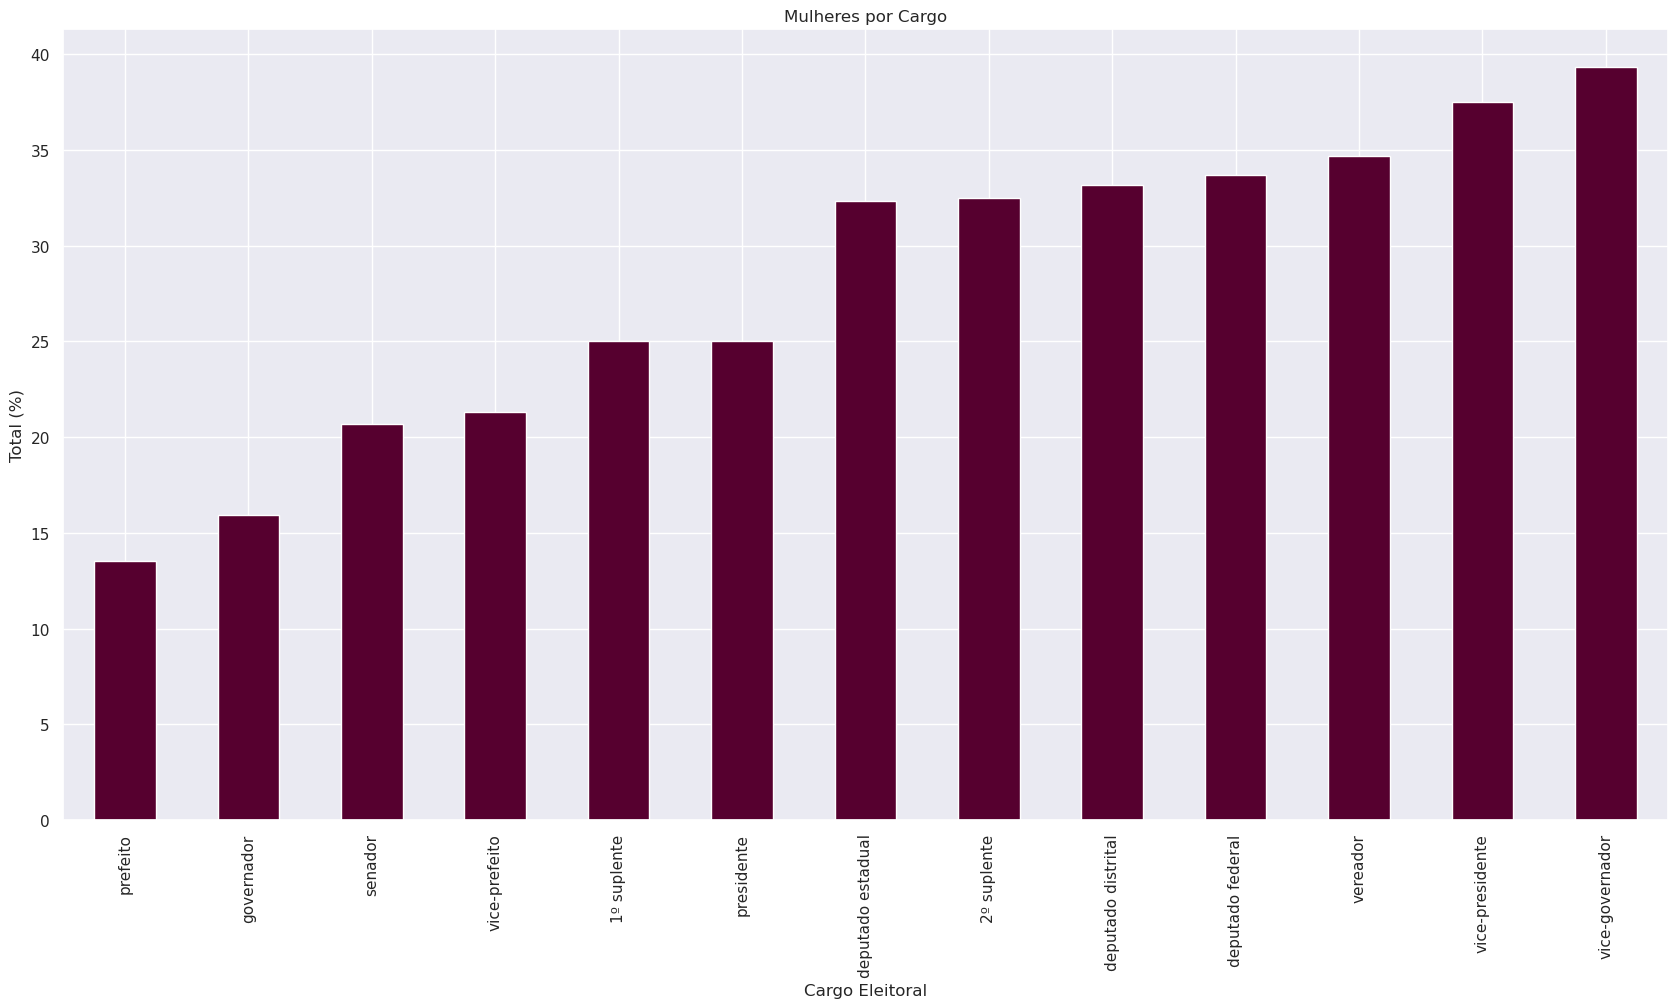

In [ ]:
# Plotando a porcentagem de mulheres em relação à seu cargo político
cargo_feminino.plot(xlabel='Cargo Eleitoral', ylabel='Total (%)', title='Mulheres por Cargo', kind='bar', color='#56002f')

<AxesSubplot: title={'center': 'Pretos e pardos por partido'}, xlabel='Total (%)', ylabel='Partidos'>

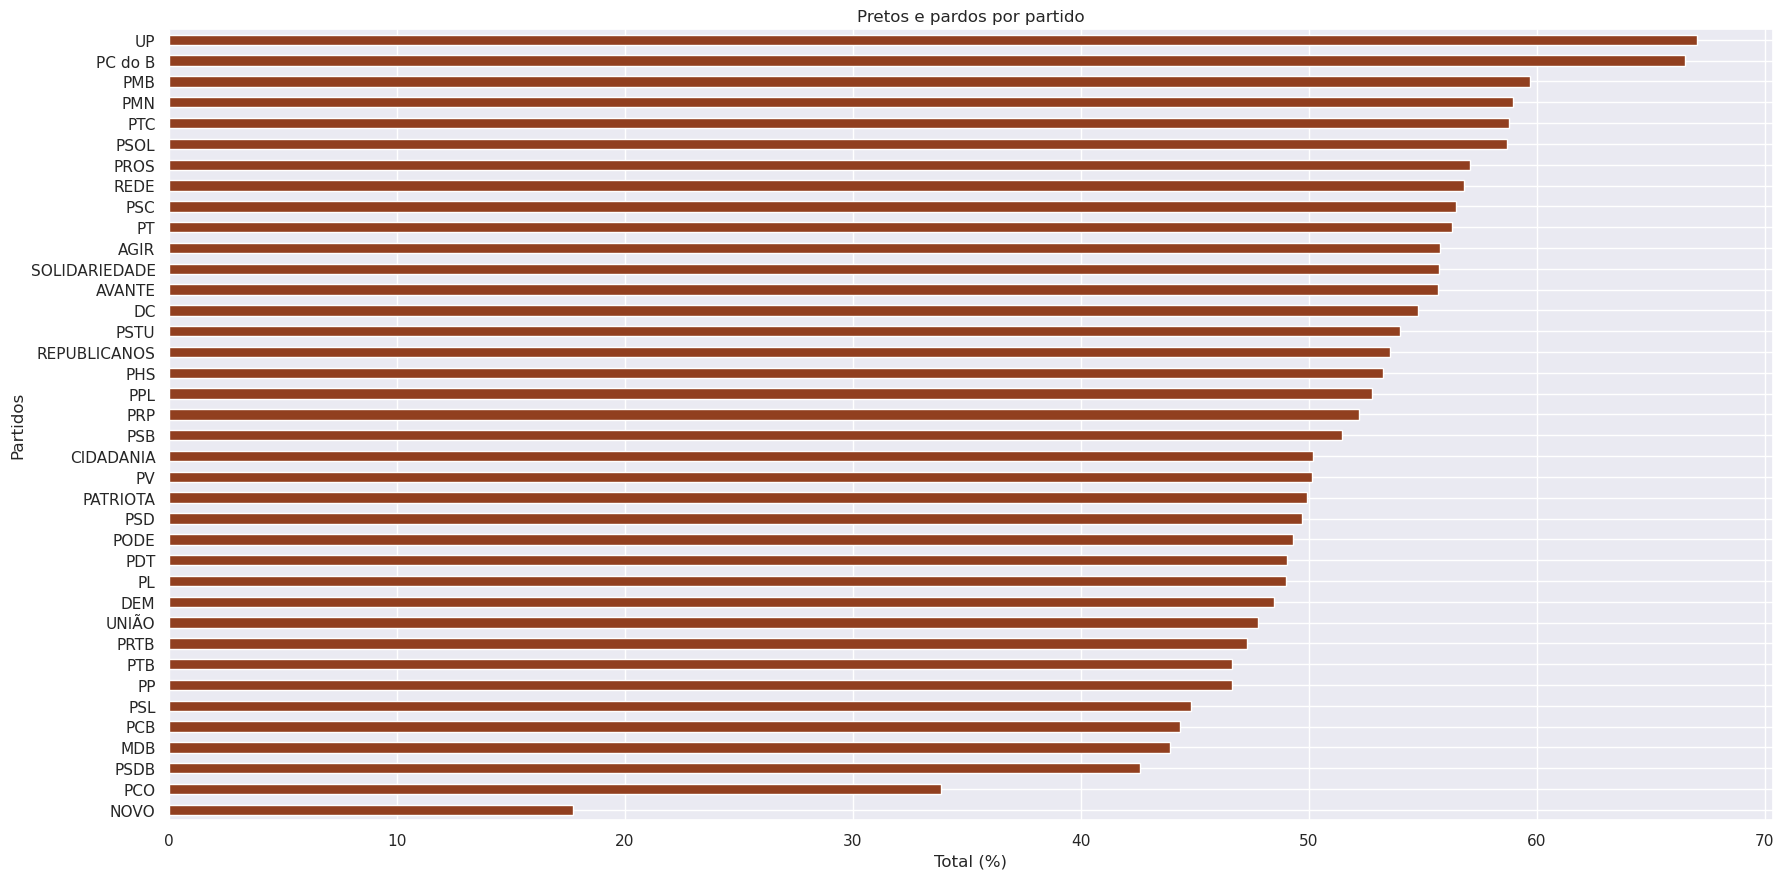

In [ ]:
# Plotando a porcentagem de pretos e pardos por partido
s_percentual_pretos_pardos.plot(xlabel='Total (%)', ylabel='Partidos', title='Pretos e pardos por partido', kind='barh', color='#913f1f')

<AxesSubplot: title={'center': 'Pretos por partido'}, xlabel='Total (%)', ylabel='Partidos'>

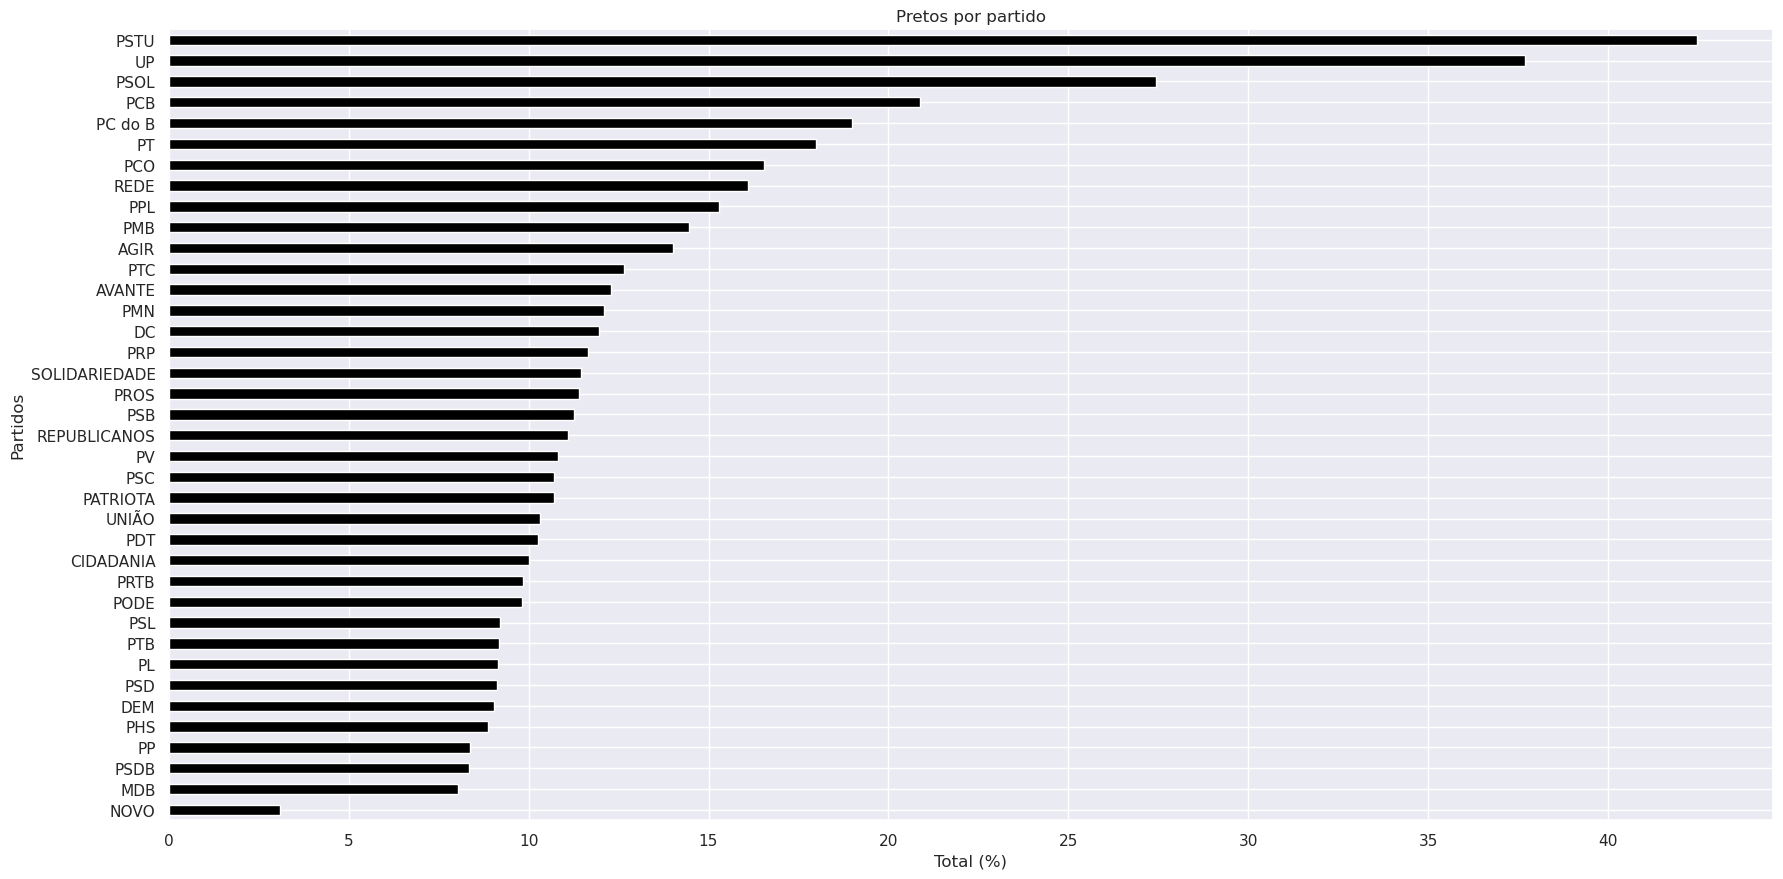

In [ ]:
# Plotando a porcentagem de pretos por partido
s_percentual_pretos.plot(xlabel='Total (%)', ylabel='Partidos', title='Pretos por partido', kind='barh', color='black')

<AxesSubplot: title={'center': 'Pardos por partido'}, xlabel='Total (%)', ylabel='Partidos'>

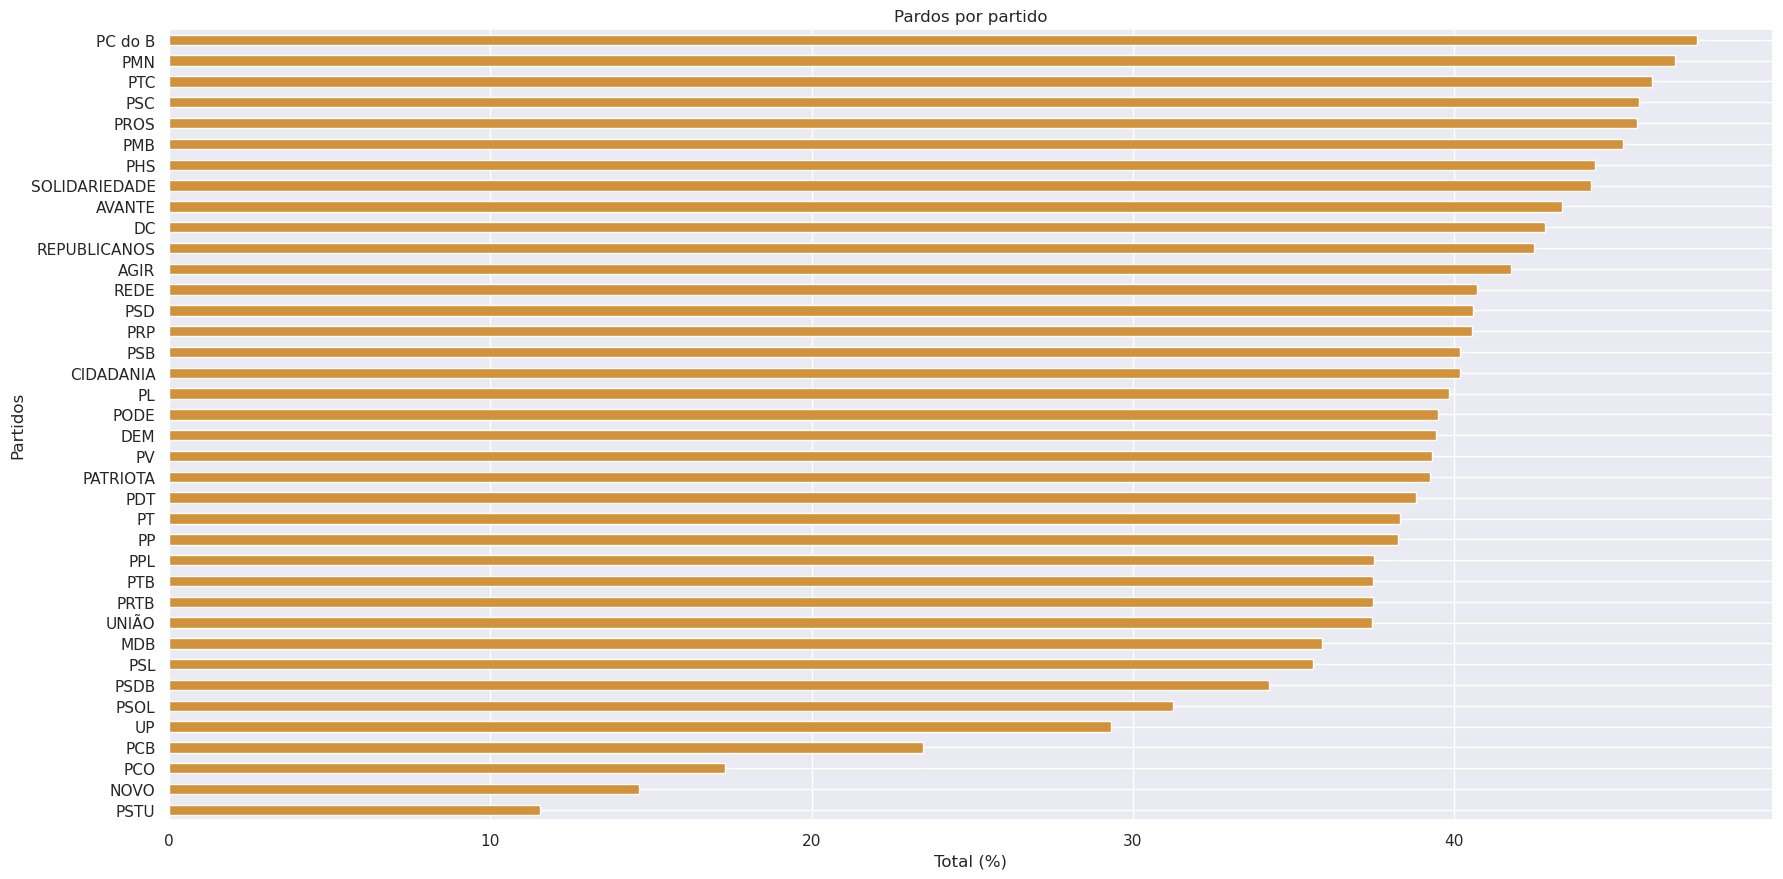

In [ ]:
# Plotando a porcentagem de pardos por partido
s_percentual_pardos.plot(xlabel='Total (%)', ylabel='Partidos', title='Pardos por partido', kind='barh', color='#d1923b')

<AxesSubplot: title={'center': 'Média de idade por cargo'}, xlabel='Cargos', ylabel='Idade'>

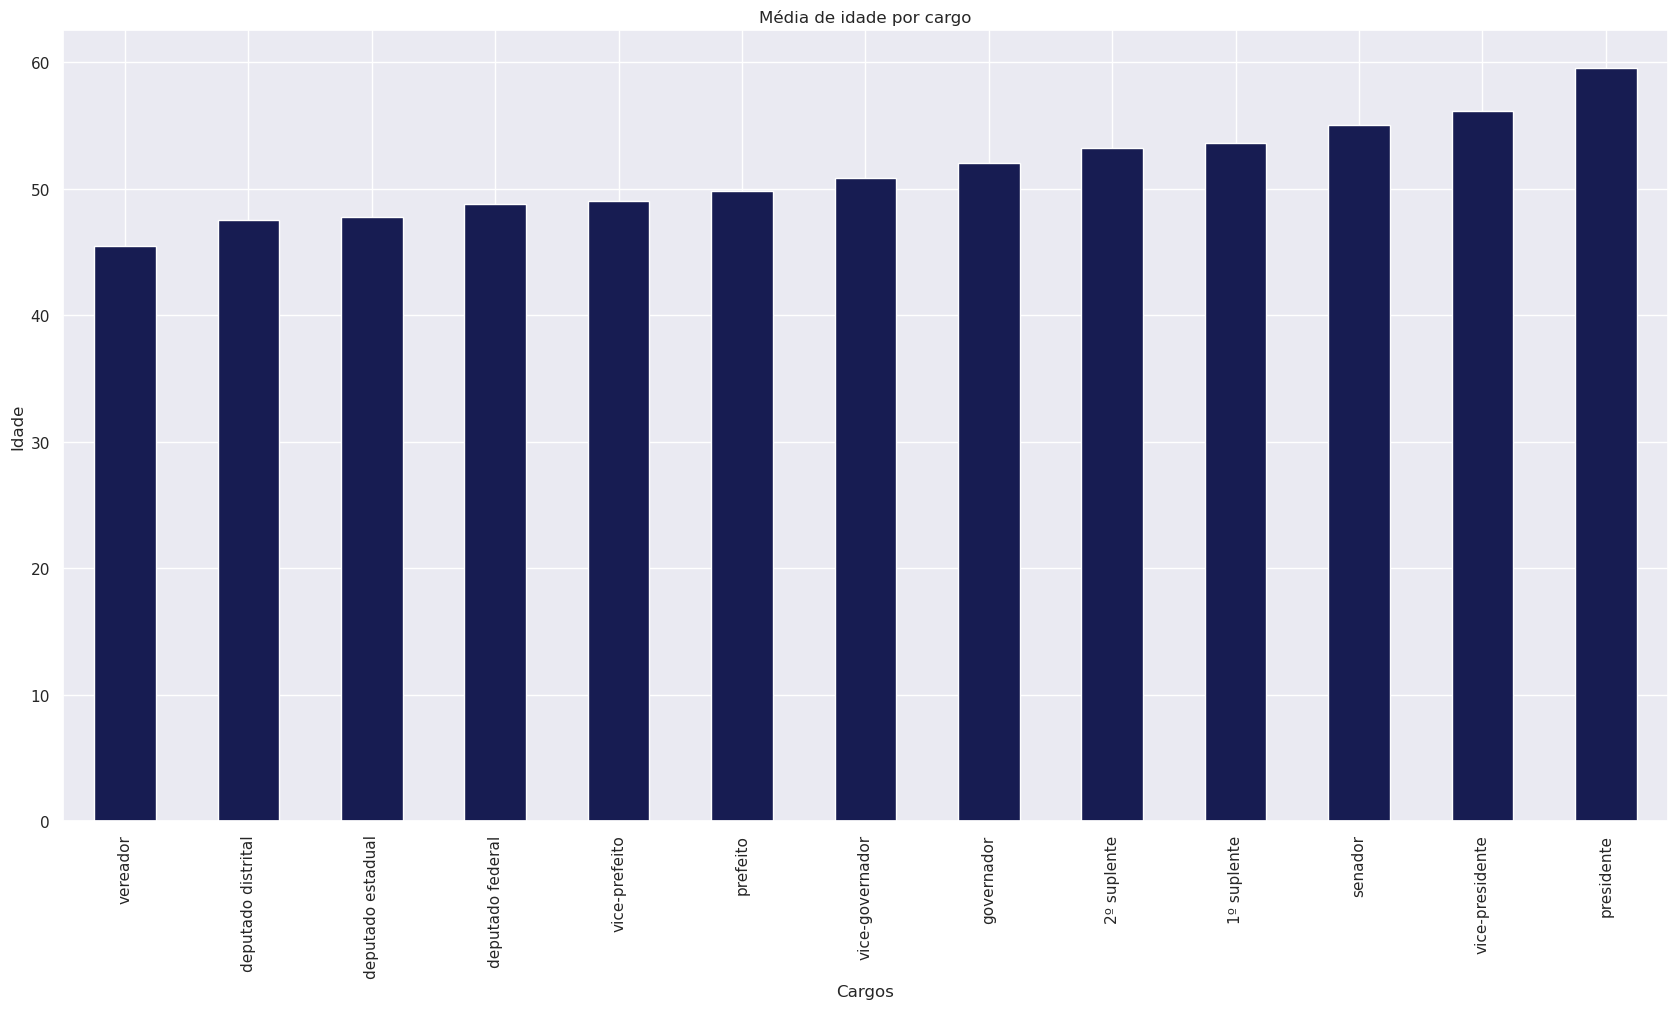

In [ ]:
# Média de idade por cargo
# Plotando a porcentagem de pardos por partido
media_idade.plot(xlabel='Cargos', ylabel='Idade', title='Média de idade por cargo', kind='bar', color='#171c52')

<AxesSubplot: title={'center': 'Ensino superior por cargo'}, xlabel='Cargos', ylabel='Total (%)'>

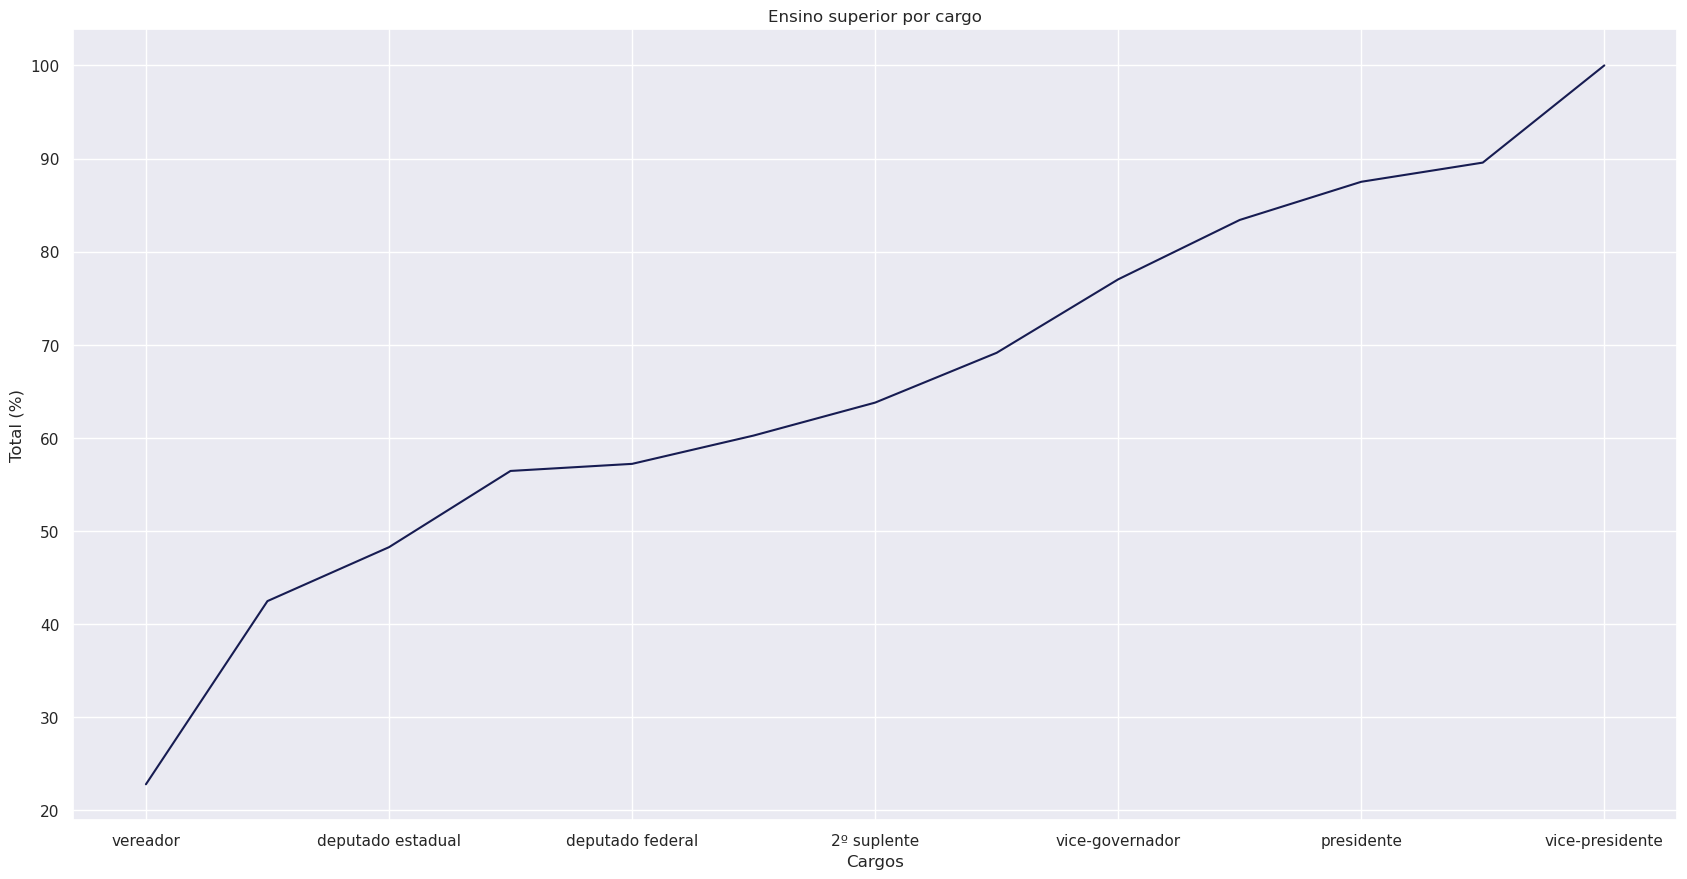

In [ ]:
# Média de idade por cargo
# Plotando a porcentagem de pardos por partido
s_superior_cargo.plot(xlabel='Cargos', ylabel='Total (%)', title='Ensino superior por cargo', kind='line', color='#171c52')

## 5. Conclusão

Neste projeto, foi realizado uma análise sobre os dados, em que todas as etapas foram realizadas. A primeira foi a Escolha do dataset, que foi algo importante, pois foi escolhido o conjunto de dados do TSE, que trás muitas informações sobre os representantes políticos no Brasil. Após isso, foi realizado a Preparação dos Dados, uma etapa muito importante, pois caso os dados não estejam formatados, isso pode tornar a análise deles algo bem complexa. Após essa etapa, foi realizada a Análise Descritiva dos dados.

É possível concluir que a Analíse Descritiva é uma ferramenta muito poderosa para a obtenção de respostas sobre algum conjunto de dados. Nesse caso foi possível obter muitas respostas sobre questionamentos que foram levantados previamente. Com isso, conseguimos entender melhor como a política brasileira está composta, e quais as características dos indivíduos que nos representam.

Há na política brasileira 28 partidos com uma média de 15.307 candidatos por partido e desvio padrão de 13.478, idicando que os dados estão dispersos no dataset. Quando observa-se o gráfico de candidatos por partido nota-se uma certa polarização dos dados, em que poucos partidos obtêm um número expressivo de candidatos enquanto outros contêm uma amostragem pequena.
 
Quando analisado a proporção de gênero por cargo observamos que a representatividade feminina não corresponde ao percentual desta classe na população, tendo o cargo de prefeito com o menor percentual e o de vice-governador com o maior. A proporção de candidatos pretos e partos nos partidos estão de certa forma correspondentes com a distribuição dessas classes na população, contudo para a população parda alguns partidos estão abaixo do esperado. 

A relação de idade por cargo eleitoral observa-se que a posição de vereador é a que apresenta menor média de idade e a de cargo de presidente a maior, com a candidata mais velha de 100 anos e os candidatos mais novos com 18 anos. Já analisando a instrução de nível superior por cargo, a posição de vice-governador apresenta todos os candidatos com esta instrução e a maioria dos partidos com mais da metade de seus colaboradores com nível superior também.

Contudo, a análise do dataset referente as eleições de 2018 às 2022 pode ser considerada como bem sucedida em que primordialmente foi feita uma análise prévia dos dados e sua respectiva limpeza, e após isto foi feito uma análise descritivia mais detalhada a respeito dos pontos mais pertinentes levantados pela equipe, e ao fim, a plotagem de seus gráficos.
